In [1]:
import matplotlib.pyplot as plt
import numpy as np
# from matplotlib_venn import venn2, venn2_circles, venn3_unweighted
# from mpl_toolkits.mplot3d import axes3d
# from mpl_toolkits import mplot3d
# from matplotlib_venn import venn3, venn3_circles
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import EngFormatter

import matplotlib.patches as patches
import matplotlib.transforms as transforms
import pandas as pd
import seaborn as sns
import os
import sys
import itertools
import logging 
from tqdm import tqdm, trange
# from tqdm.notebook import tqdm
from sklearn.neighbors import KDTree
from scipy.spatial import distance_matrix
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from numpy.linalg import svd
import umap
import scipy 
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import plot, iplot, init_notebook_mode
from sklearn.metrics import accuracy_score
from sklearn import datasets

pd.set_option('display.max_rows', 100)

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)



## Single peak clustering - Formate

In [42]:
metabolites = pd.read_excel('~/Documents/IBS/Metadata/MIBS_NMR_data_signif_metabs.xlsx')
metabolites[metabolites.iloc[:, 0] == 'Uracil']

Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3  PID         1112  \
1361     Uracil   5.792258   0.004982    0.03218  NaN  1278.871644   
1362     Uracil   5.792758   0.000389   0.006443  NaN  2203.662160   
1363     Uracil   5.793258   0.000566   0.008112  NaN  2866.606079   
1364     Uracil   5.793758    0.00004   0.001407  NaN  2118.660786   
1365     Uracil   5.794258    0.00004   0.001395  NaN  1829.131715   
1366     Uracil   5.794758   0.000038   0.001364  NaN  3056.338175   
1367     Uracil   5.795258   0.000006   0.000347  NaN  2202.039310   
1368     Uracil   5.795758   0.000012   0.000571  NaN  2788.481708   
1369     Uracil   5.796258   0.000006    0.00032  NaN  3096.235122   
1370     Uracil   5.796758   0.000002   0.000132  NaN  2643.814422   
1371     Uracil   5.797258   0.000005   0.000277  NaN  2778.629863   
1372     Uracil   5.797758   0.000022   0.000898  NaN  3278.863770   
1373     Uracil   5.798258   0.000125   0.003058  NaN  3524.247517   
1374     Uracil   5.798758   0.004234   0.029202  NaN  4658.780377   
1375     Uracil   5.806257   0.006214   0.037251  NaN  5081.060835   
1376     Uracil   5.806757   0.000384   0.006416  NaN  5274.435050   
1377     Uracil   5.807257   0.000103     0.0027  NaN  4865.089950   
1378     Uracil   5.807757   0.000075   0.002225  NaN  6272.541582   
1379     Uracil   5.808257   0.000031   0.001189  NaN  6999.520634   
1380     Uracil   5.808757   0.000016   0.000726  NaN  6258.018658   
1381     Uracil   5.809257   0.000003   0.000191  NaN  5007.297985   
1382     Uracil   5.809757   0.000004   0.000239  NaN  3037.286336   
1383     Uracil   5.810257   0.000009   0.000464  NaN  3311.240155   
1384     Uracil   5.810757    0.00011   0.002815  NaN  3963.361217   
1385     Uracil   5.811257   0.001063   0.012091  NaN  4764.338717   
1386     Uracil   7.525191   0.005795   0.035601  NaN  1765.751159   

              1175            20           284           214  ...  \
1361   1347.023247   5480.947157   4083.800281   3919.740270  ...   
1362   2982.247350   4837.913665   4594.351319   4603.448890  ...   
1363   3128.563729   5279.838483   7279.388540   6908.718463  ...   
1364   3771.877569   5485.893555   7390.411178   7741.372326  ...   
1365   4304.829450   6157.109460   6636.716736   8359.534299  ...   
1366   3933.800919   6015.654708   5570.138689   8204.952910  ...   
1367   3454.874330   7844.862550   6061.183908   9744.252053  ...   
1368   4722.405219  10308.370430   4413.596988  10878.066228  ...   
1369   4862.789108  12268.896227   4007.359286  12790.804751  ...   
1370   5515.702575  15424.969623   6535.043557  14310.476631  ...   
1371   7377.807595  20124.530247   8658.943575  18211.215356  ...   
1372   9044.976325  25806.547736  10081.074131  25163.907235  ...   
1373  11201.611648  33541.771155  13509.082100  35017.207376  ...   
1374  14200.884779  46899.864461  16198.322207  49008.970969  ...   
1375   7134.367281  13186.480520   7338.424362  14351.150677  ...   
1376   6015.563017  12441.400834   6201.046420  13456.369836  ...   
1377   6287.875500  12066.007149   6742.754885  15294.365898  ...   
1378   6307.978850  13881.283472   7593.053500  16577.568759  ...   
1379   6745.111525  14707.724625   7139.812057  20902.036356  ...   
1380   7521.730400  15923.756386   7894.399773  27392.955885  ...   
1381   9049.333456  19543.212342   8663.483466  31129.258580  ...   
1382   9174.818187  23065.924216  10472.405498  31001.947613  ...   
1383  10236.337244  27305.667018  11894.239073  31187.231970  ...   
1384  11442.763156  33354.555482  14287.698614  35251.982462  ...   
1385  12995.219782  43651.574326  16103.452845  45701.518452  ...   
1386   1843.214494  12891.754779   4788.103355  14947.359977  ...   

              1040           357           277          1100          1132  \
1361   4474.019432   2616.196782   3869.912949   3861.775066   3091.371135   
1362   4907.170660   3935.275306   4031.559004   3981.505960   4034.704595   
1363   6291.1110

In [43]:
metabolites[1350:1450]

Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3  PID          1112  \
1350     Unknown 24   5.298277   0.002299   0.019728  NaN   8936.160746   
1351     Unknown 24   5.298777   0.000695   0.009246  NaN   7756.732222   
1352     Unknown 24   5.299277   0.000453   0.007041  NaN   9677.618182   
1353     Unknown 24   5.299777   0.000916    0.01111  NaN  13198.295944   
1354     Unknown 24   5.569267   0.007162   0.040838  NaN   4191.500812   
1355     Unknown 25   9.362121   0.002398   0.020313  NaN   3106.001371   
1356     Unknown 25   9.366621   0.005415   0.033926  NaN   4145.443144   
1357     Unknown 25    9.36712   0.004789   0.031225  NaN   3802.695598   
1358     Unknown 25    9.37412   0.006711   0.039248  NaN   2656.555030   
1359     Unknown 25    9.37462   0.004128   0.028832  NaN   2081.174915   
1360     Unknown 25    9.38412   0.008402   0.045533  NaN   1694.090590   
1361         Uracil   5.792258   0.004982    0.03218  NaN   1278.871644   
1362         Uracil   5.792758   0.000389   0.006443  NaN   2203.662160   
1363         Uracil   5.793258   0.000566   0.008112  NaN   2866.606079   
1364         Uracil   5.793758    0.00004   0.001407  NaN   2118.660786   
1365         Uracil   5.794258    0.00004   0.001395  NaN   1829.131715   
1366         Uracil   5.794758   0.000038   0.001364  NaN   3056.338175   
1367         Uracil   5.795258   0.000006   0.000347  NaN   2202.039310   
1368         Uracil   5.795758   0.000012   0.000571  NaN   2788.481708   
1369         Uracil   5.796258   0.000006    0.00032  NaN   3096.235122   
1370         Uracil   5.796758   0.000002   0.000132  NaN   2643.814422   
1371         Uracil   5.797258   0.000005   0.000277  NaN   2778.629863   
1372         Uracil   5.797758   0.000022   0.000898  NaN   3278.863770   
1373         Uracil   5.798258   0.000125   0.003058  NaN   3524.247517   
1374         Uracil   5.798758   0.004234   0.029202  NaN   4658.780377   
1375         Uracil   5.806257   0.006214   0.037251  NaN   5081.060835   
1376         Uracil   5.806757   0.000384   0.006416  NaN   5274.435050   
1377         Uracil   5.807257   0.000103     0.0027  NaN   4865.089950   
1378         Uracil   5.807757   0.000075   0.002225  NaN   6272.541582   
1379         Uracil   5.808257   0.000031   0.001189  NaN   6999.520634   
1380         Uracil   5.808757   0.000016   0.000726  NaN   6258.018658   
1381         Uracil   5.809257   0.000003   0.000191  NaN   5007.297985   
1382         Uracil   5.809757   0.000004   0.000239  NaN   3037.286336   
1383         Uracil   5.810257   0.000009   0.000464  NaN   3311.240155   
1384         Uracil   5.810757    0.00011   0.002815  NaN   3963.361217   
1385         Uracil   5.811257   0.001063   0.012091  NaN   4764.338717   
1386         Uracil   7.525191   0.005795   0.035601  NaN   1765.751159   
1387     Unknown 26   6.192743   0.001958   0.017955  NaN   2329.254382   
1388     Unknown 26   6.193243   0.000526   0.007716  NaN   2843.821576   
1389     Unknown 26   6.193743   0.000018   0.000776  NaN   1662.535168   
1390     Unknown 26   6.194243   0.000001   0.000094  NaN   1937.081112   
1391     Unknown 26   6.194743   0.000006    0.00032  NaN   2682.440781   
1392     Unknown 26   6.195242   0.000028   0.001081  NaN   3117.132909   
1393     Unknown 26   6.195742   0.000107   0.002774  NaN   6608.099844   
1394     Unknown 26   6.196242   0.000715   0.009355  NaN  12992.301077   
1395     Unknown 26   6.196742   0.005111   0.032684  NaN  11069.278977   
1396  Unknown(s) 27   6.404234   0.001022   0.011851  NaN   2075.495089   
1397  Unknown(s) 27   6.404734   0.000239   0.004799  NaN   3129.913909   
1398  Unknown(s) 27   6.405234   0.000007   0.000384  NaN   3944.463536   
1399  Unknown(s) 27   6.405734   0.000015   0.000667  NaN   7256.135820   
1400  Unknown(s) 27   6.406234    0.00014   0.003277  NaN   9701.618524   
1401  Unknown(s) 27   6.413734   0.005699   0.035047  NaN    991.849952   
1402  Unknown(s) 27   6.414234   0

In [41]:
metabolites.iloc[:, 0].drop_duplicates().to_list()

['name',
 'Bile salts',
 'Unknown 1a',
 'Unknown 2a',
 'Caproate',
 'Valerate',
 'Unknown 3B',
 'Isoleucine',
 'Leucine',
 'Valine',
 'Unknown 4',
 'Unknown 5',
 'Unknown 6',
 'Unknown 7',
 '5-Aminovalerate',
 'Unknown 8',
 'Unknown 9',
 'Acetate',
 'Unknown 10',
 'Unknown 11',
 'Unknown 12',
 'Methionine',
 'Unknown 13',
 'Unknown 14',
 'Unknown 15',
 'Unknown 16',
 'Aspartate',
 '2-Methylproline',
 'Unknown 17',
 'Unknown 18',
 'Beta-glucose',
 'Alpha-glucose',
 'Unknown 19',
 'Sucralose',
 'Serine',
 'Unknown 20',
 'Unknown 21',
 'Unknown 22',
 'Unknown 23',
 'Unknown 24',
 'Unknown 25',
 'Uracil',
 'Unknown 26',
 'Unknown(s) 27',
 'Unknown 28',
 'Unknown 29',
 'Tyrosine',
 'Unknown 30B',
 'Phenylalanine',
 'Nicotinate',
 'Xanthine IBS',
 'Xanthine HC',
 '3-Methylhistidine',
 'Formate',
 'Homarine']

In [3]:
#metabolites.iloc[:, 0].value_counts()
formate_df = metabolites[metabolites.iloc[:, 0] == 'Formate'].iloc[:, 5:]
display(formate_df)
pca_df = formate_df.transpose()

pca = PCA(n_components=2)
tsne = TSNE(n_components=2)
scaler = StandardScaler()
pca_df = scaler.fit_transform(pca_df)
scores = pca.fit_transform(pca_df)
tsne_embeddings = tsne.fit_transform(pca_df)

kmeans = KMeans(n_clusters=2)
kmeans_df = kmeans.fit_transform(tsne_embeddings)
clusters = kmeans.labels_
fig_df = pd.DataFrame(tsne_embeddings)

fig_df['IBS/HC'] = nmr_peaks.iloc[:, 1]

fig = px.scatter(fig_df, x=0, y=1, color=clusters)
fig.show()

fig = px.scatter(fig_df, x=0, y=1, color=fig_df['IBS/HC'])
fig.show()

#np.savetxt('formate_cluster_labels.txt', clusters, fmt='%i', delimiter=',')

1112          1175          20            284           214   \
1694  5889.442105  15713.071293  46270.483016  14533.674911  76087.802361   
1695  3741.003123   7844.370329  18989.799388   7388.909213  28315.807823   
1696  2482.991668   4108.100770   9839.893698   3207.832498  11999.371031   
1697  2650.466762   3484.341061   5902.653507   3384.735816   5666.855648   
1698  3361.347138   2815.616138   4232.093585   2699.437497   4697.245315   
1699  2308.917283   2611.295175   3994.801518   2701.429113   3741.215934   
1700  2190.387610   1359.784445   3398.528451   1664.570532   3233.496695   

              443           383           355           40            1205  \
1694  29479.817876  11721.430448  19869.860890  49400.717150  16594.742434   
1695  13041.308397   5181.737647   8516.530617  74935.142185   7978.682247   
1696   6311.343297   3348.245140   5745.817446  68529.868862   4892.445961   
1697   3750.885973   2969.970691   5008.418986  35841.752755   3748.337166   
1698   2907.917397   2190.286773   3278.761083  17842.180101   3725.950759   
1699   2129.026546   2008.070583   2775.625430  10503.322580   3563.998817   
1700   2674.489763    947.544629   1487.353915   7681.600567   2872.715091   

      ...          1040          357           277           1100  \
1694  ...  10339.848400  32840.545393  21978.746996  15916.609083   
1695  ...  12784.758285  14088.630232  16422.981970  13202.269104   
1696  ...   8614.337520   8297.759925  10325.493700   8799.928797   
1697  ...   4872.162471   6396.418864   7281.213857   5400.602108   
1698  ...   2994.212467   3685.545220   6172.494694   5046.630405   
1699  ...   3514.518992   3211.707611   5509.792639   4543.836804   
1700  ...   3660.720433   3116.259479   4450.700240   3633.727561   

              1132          269           298           1160          1058  \
1694  19839.911707  41033.805979  42382.244395  28355.449555   5396.923294   
1695  16064.623577  30726.491968  54097.524741  28894.939612   9578.258706   
1696  10433.750994  18440.344908  43846.276589  23754.593666  16619.973588   
1697   6824.645488  10473.095759  24522.839307  17320.439964  19926.226450   
1698   4507.023856   6444.451553  14192.820800  12361.069462  17281.724624   
1699   4651.662290   5714.333434   8568.213131   8461.970688  11123.230631   
1700   4322.944195   4587.037416   5833.960393   6124.178459   7814.444757   

              1024  
1694  19962.551471  
1695  12671.660049  
1696   8701.077287  
1697   5651.075244  
1698   5090.095972  
1699   4164.304858  
1700   3176.994497  

[7 rows x 267 columns]

/home/mk218/anaconda3/envs/py39-CMR/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/mk218/anaconda3/envs/py39-CMR/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



NameError: name 'nmr_peaks' is not defined

#### save clusters to file for grouping

order of cluster assignment for samples is same as on `MIBS_NMR_data_signif_metabs.xlsx` and `IBS_HNMR_data_n267` files

<AxesSubplot:xlabel='4', ylabel='Density'>

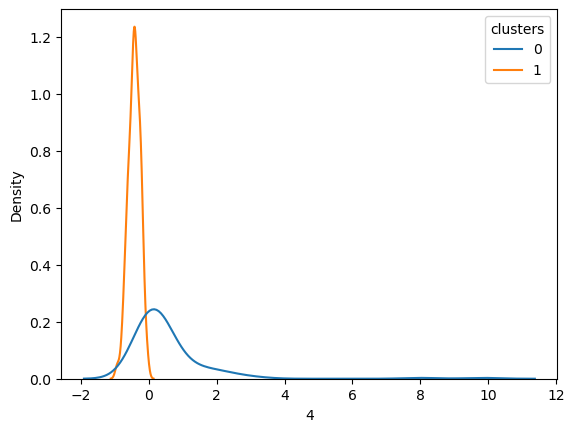

In [6]:
corr_df = pd.DataFrame(pca_df)
corr_df['clusters'] = clusters
sns.kdeplot(data=corr_df, x=corr_df.iloc[:,4], hue='clusters')
# sns.kdeplot(corr_df[corr_df.clusters==0].iloc[:,:-1])


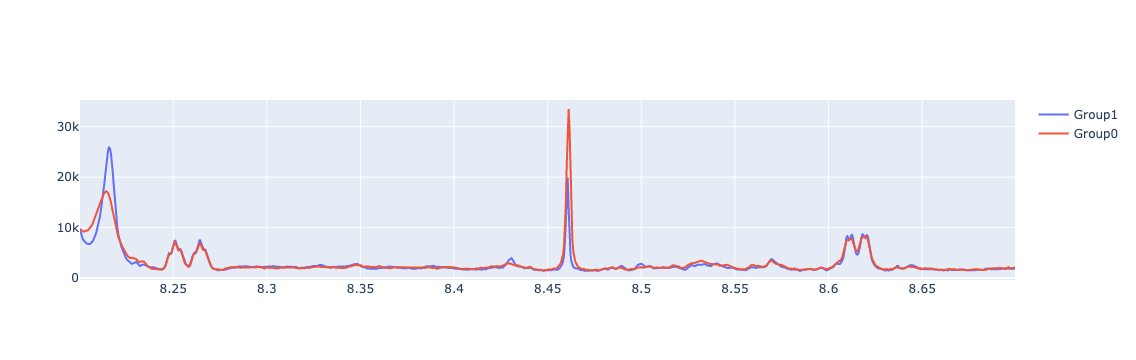

In [7]:
fig_df = nmr_peaks.iloc[:, 3:]
fig_df['clusters'] = clusters
# plt.figure(figsize=(15,8))
# sns.scatterplot(y=fig_df[fig_df.clusters == 1].iloc[:, :-1].mean()[15000:16000], x=x_axis[15000:16000], s=10)
# sns.scatterplot(y=fig_df[fig_df.clusters == 0].iloc[:, :-1].mean()[15000:16000], x=x_axis[15000:16000], s=10)

line1 = go.Scatter(y=fig_df[fig_df.clusters == 1].iloc[:, :-1].mean()[15000:16000], x=x_axis[15000:16000],name='Group1')
line2 = go.Scatter(y=fig_df[fig_df.clusters == 0].iloc[:, :-1].mean()[15000:16000], x=x_axis[15000:16000], name='Group0')
fig=dict(data=[line1,line2])
iplot(fig)

## Interactive Figures 

In [3]:
# formate_100t10nn_classic = pd.read_csv('classicRF_feature_impo_100t10nn_formate.csv').iloc[:, 1:]
# formate_100t10nn_lavaset = pd.read_csv('lavaset_feature_impo_100t10nn_formate.csv').iloc[:, 1:]

# simgroups_100t10nn_classic = pd.read_csv('../ethanol-uracil-testing/classicRF_feature_impo_100t10nn_simulatedgroups_test.csv').iloc[:, 1:]
# simgroups_100t10nn_lavaset = pd.read_csv('../ethanol-uracil-testing/lavaset_feature_impo_100t10nn_simulatedgroups_test.csv').iloc[:, 1:]

# ibsvshc_10000t10nn_classic = pd.read_csv('../classicRF_feature_impo_10000t10nnIBSvsHC_random_state10.csv').iloc[:, 1:]
# ibsvshc_10000t10nn_lavaset = pd.read_csv('../lavaset_feature_impo_10000t10nnIBSvsHC_random_state10.csv').iloc[:, 1:]
classicRF_metrics = pd.read_csv('classicRF_metrics_100t10nnSIMv2.csv')
lavaset_metrics = pd.read_csv('lavaset_metrics_100t10nnSIMv2.csv')


nmr_peaks = pd.read_csv('~/Documents/IBS/NMR_data/IBS_HNMR_data_n267.csv')
x_axis = nmr_peaks.columns[3:].astype('float')
nmr_peaks_avg = nmr_peaks.iloc[:, 3:].mean(axis=0)
# lavaset_metrics1.iloc[:, 1:].to_csv('lavaset_metrics_100t10nnSIM.csv', index=False)


Source    Metric     value
0    classicRF  Accuracy  0.814815
1    classicRF  Accuracy  0.833333
2    classicRF  Accuracy  0.796296
3    classicRF  Accuracy  0.833333
4    classicRF  Accuracy  0.814815
..         ...       ...       ...
155    LAVASET  F1 Score  0.851021
156    LAVASET  F1 Score  0.851021
157    LAVASET  F1 Score  0.851021
158    LAVASET  F1 Score  0.907568
159    LAVASET  F1 Score  0.870054

[160 rows x 3 columns]

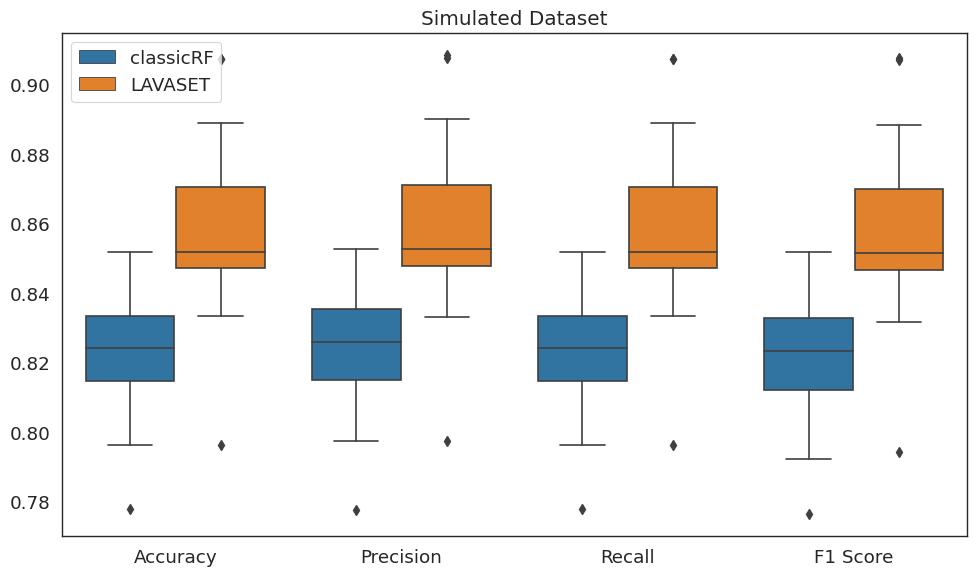

{'Random State': nan, 'Accuracy': 7.318577259601884e-05, 'Precision': 9.081412847548527e-05, 'Recall': 7.318577259601884e-05, 'F1 Score': 7.046478447730656e-05}


In [4]:
df_concat = pd.concat([classicRF_metrics, lavaset_metrics])
df_concat['Source'] = ['classicRF'] * classicRF_metrics.shape[0] + ['LAVASET'] * lavaset_metrics.shape[0]

sns.set_style("white")
sns.set_context("paper", font_scale=1.5)
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

df_concat_melted = pd.melt(df_concat, id_vars='Source', value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'], var_name='Metric')
sns.boxplot(data=df_concat_melted, x='Metric', y='value', hue='Source')
display(df_concat_melted)
plt.xlabel('')
plt.ylabel('')
# plt.ylim(0.75, 1)
plt.title('Simulated Dataset')

# Display the plot
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('uracil-ethanol-metrics.png')
plt.show()

p_values = {}
for column in classicRF_metrics.columns:
    source1_values = classicRF_metrics[column]
    source2_values = lavaset_metrics[column]
    _, p_value = scipy.stats.ttest_rel(source1_values, source2_values)
    p_values[column] = p_value
print(p_values)




In [5]:
def make_importance_plot(results, title): 
    df = pd.DataFrame({'1':nmr_peaks_avg})
    df['gini importance'] = (results.iloc[:, 2].values)/np.sum(results.iloc[:,2]) # normalized by sum of all gini values 

    df['δ'] = x_axis
    fig = px.scatter(df,x=df['δ'],y=df['1'], color='gini importance', title=title)
    fig.show()


    
def make_countseval_plot(ax, results, title):
    df = pd.DataFrame({'1':nmr_peaks_avg})
    df['times evaluated'] = results.iloc[:, 0].values
    df['δ'] = x_axis
    sns.histplot(ax=ax, data=df['times evaluated'])
    ax.set_title(title)

def make_countsel_plot(ax, results, title):
    df = pd.DataFrame({'1':nmr_peaks_avg})
    df['times selected'] = results.iloc[:, 1].values
    df['δ'] = x_axis
    sns.histplot(ax=ax, data=df['times selected'])
    ax.set_title(title)
    

LAVASET 
- time for 100 trees: 112.33406901359558 sec<br>
- accuracy: 0.7777777777777778, <br> 0.8148148148148148 ([0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0
 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0
 0.0 0.0 1.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0]), random_state=15, 25 <br>
 0.8703703703703703 random_state = 90
- y_pred: [1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 1.0
 1.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0
 1.0 1.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0]


classicRF 
- time for 100 trees: 6.485620737075806
- accuracy: 0.7407407407407407 random_state=15, 25 <br>
0.8333333333333334 random_state = 90
- y_pred: [1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0], [0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0
 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1]


In [6]:
# in the simulated dataset random state 70 has the best accuracies in both so picking this to show importances 

classicRF_impo_100t10nn = pd.read_csv('classicRF_feature_impo_100t10nnSIM_random_state18.csv').iloc[:, 1:]
lavaset_impo_100t10nn = pd.read_csv('lavaset_feature_impo_100t10nnSIM_random_state18v2.csv').iloc[:, 1:]


In [7]:
classicRF_impo_100t10nn.loc[:, 'gini_normalized'] = classicRF_impo_100t10nn.iloc[:, 2].values/np.sum(classicRF_impo_100t10nn.iloc[:,2])*100
lavaset_impo_100t10nn.loc[:, 'gini_normalized'] = lavaset_impo_100t10nn.iloc[:, 2].values/np.sum(lavaset_impo_100t10nn.iloc[:,2])*100
lavaset_impo_100t10nn.loc[:, 'gini_normalized'].max()

0.1808355784122838

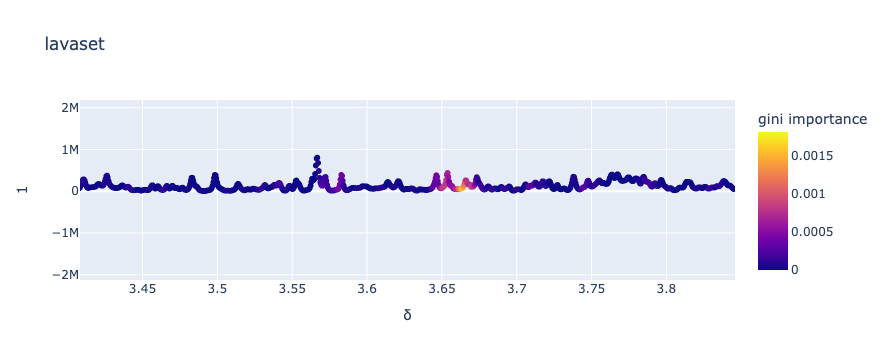

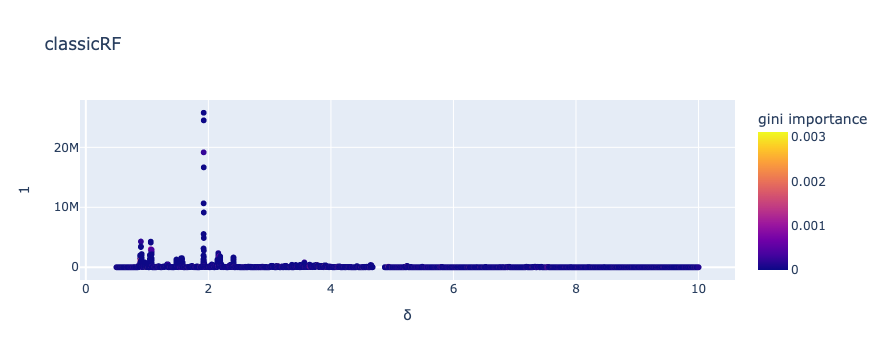

In [113]:
make_importance_plot(lavaset_impo_100t10nn, 'lavaset')
make_importance_plot(classicRF_impo_100t10nn, 'classicRF')

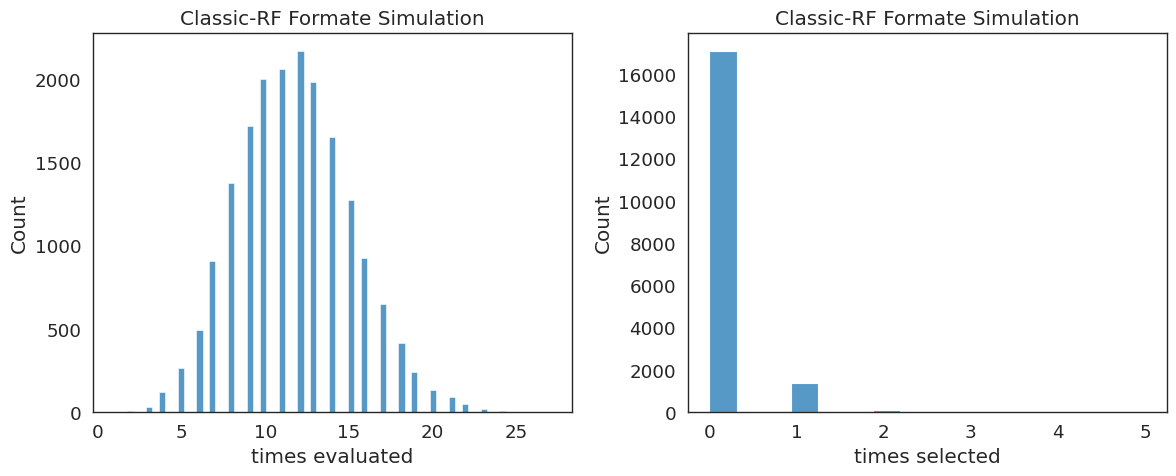

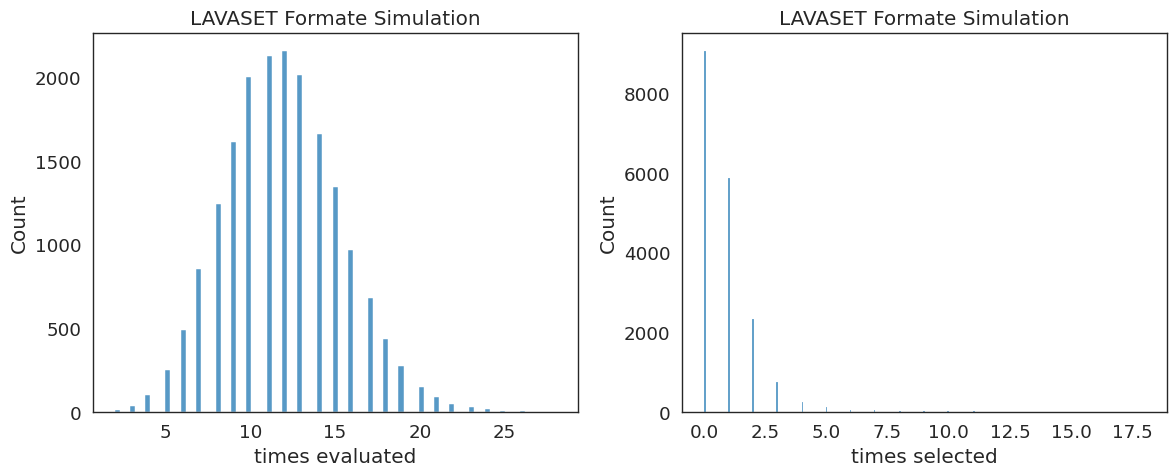

In [10]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
make_countseval_plot(axes[0], classicRF_impo_100t10nn, "Classic-RF Formate Simulation")
make_countsel_plot(axes[1], classicRF_impo_100t10nn, "Classic-RF Formate Simulation")
plt.tight_layout()
plt.show()
# fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# make_countseval_plot(axes[0], lavaset_impo_100t10nn3, "LAVASET Formate Simulation")
# make_countsel_plot(axes[1], lavaset_impo_100t10nn3, "LAVASET Formate Simulation")
# plt.tight_layout()
# plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
make_countseval_plot(axes[0], lavaset_impo_100t10nn, "LAVASET Formate Simulation")
make_countsel_plot(axes[1], lavaset_impo_100t10nn, "LAVASET Formate Simulation")
plt.tight_layout()
plt.show()


Generated a 2-class vector for the IBS data, used 2 compounds for this that each have 2 multiplets in the spectrum, and these signals are spread out.
 
In the first sheet you can see the class to use for classification, in the second sheet are the features used to generate the classes and how I would expect to see the associations (one compound is higher in one group, the other compound is higher in the other group): so the importance might be different between the two groups.
 
Do note that one of the compounds has some correlated features that are not marked, this is inherent in the data, and we can quantify this later on.
For now we’d expect to see that at least these features are deemed important by the classification models (LAVASET/RF), but there can probably be additional ones that are also important.
But this allows us to calculate a type of ‘recall’ for feature importance perhaps?

In [8]:
groups = pd.read_excel('simulated_groups.xlsx', sheet_name=0)
features = df = pd.read_excel('simulated_groups.xlsx', sheet_name=1)
ethanol_indeces = features[features.compound =='ethanol']['index']
uracil_indeces = features[features.compound =='uracil']['index']
features[features.compound =='uracil']

index       ppm compound  associated_more_with_class
144  10197  5.798258   uracil                           1
145  10198  5.798758   uracil                           1
146  10199  5.799258   uracil                           1
147  10200  5.799758   uracil                           1
148  10201  5.800258   uracil                           1
149  10202  5.800758   uracil                           1
150  10203  5.801258   uracil                           1
151  10204  5.801758   uracil                           1
152  10205  5.802258   uracil                           1
153  10206  5.802758   uracil                           1
154  10207  5.803258   uracil                           1
155  10208  5.803758   uracil                           1
156  10209  5.804258   uracil                           1
157  10210  5.804758   uracil                           1
158  10211  5.805257   uracil                           1
159  10212  5.805757   uracil                           1
160  10213  5.806257   uracil                           1
161  10214  5.806757   uracil                           1
162  10215  5.807257   uracil                           1
163  10216  5.807757   uracil                           1
164  10217  5.808257   uracil                           1
165  10218  5.808757   uracil                           1
166  10219  5.809257   uracil                           1
167  10220  5.809757   uracil                           1
168  10221  5.810257   uracil                           1
169  10222  5.810757   uracil                           1
170  10223  5.811257   uracil                           1
171  10224  5.811757   uracil                           1
172  10225  5.812257   uracil                           1
173  10226  5.812757   uracil                           1
174  10227  5.813257   uracil                           1
175  10228  5.813757   uracil                           1
176  10229  5.814257   uracil                           1
177  10230  5.814757   uracil                           1
178  10231  5.815257   uracil                           1
179  10232  5.815757   uracil                           1
180  10233  5.816257   uracil                           1
181  10234  5.816757   uracil                           1
182  10235  5.817257   uracil                           1
183  10236  5.817757   uracil                           1
184  10237  5.818257   uracil                           1
185  10238  5.818757   uracil                           1
186  10239  5.819257   uracil                           1
187  10240  5.819757   uracil                           1
188  13665  7.532191   uracil                           1
189  13666  7.532691   uracil                           1
190  13667  7.533191   uracil                           1
191  13668  7.533691   uracil                           1
192  13669  7.534191   uracil                           1
193  13670  7.534691   uracil                           1
194  13671  7.535191   uracil                           1
195  13672  7.535691   uracil                           1
196  13673  7.536191   uracil                           1
197  13674  7.536691   uracil                           1
198  13675  7.537191   uracil                           1
199  13676  7.537691   uracil                           1
200  13677  7.538191   uracil                           1
201  13678  7.538691   uracil                           1
202  13679  7.539191   uracil                           1
203  13680  7.539691   uracil                           1
204  13681  7.540191   uracil                           1
205  13682  7.540691   uracil                           1
206  13683  7.541191   uracil                           1
207  13684  7.541691   uracil                           1
208  13685  7.542191   uracil                           1
209  13686  7.542691   uracil                           1
210  13687  7.543191   uracil                           1
211  13688  7.543691   uracil                           1
212

## Paper Figures

In [119]:
simgroups_100t10nn_lavaset
features[features.compound == 'ethanol']['index'].values

array([1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356,
       1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367,
       1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378,
       1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389,
       1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400,
       1401, 1402, 1403, 1404, 1405, 1406, 6286, 6287, 6288, 6289, 6290,
       6291, 6292, 6293, 6294, 6295, 6296, 6297, 6298, 6299, 6300, 6301,
       6302, 6303, 6304, 6305, 6306, 6307, 6308, 6309, 6310, 6311, 6312,
       6313, 6314, 6315, 6316, 6317, 6318, 6319, 6320, 6321, 6322, 6323,
       6324, 6325, 6326, 6327, 6328, 6329, 6330, 6331, 6332, 6333, 6334,
       6335, 6336, 6337, 6338, 6339, 6340, 6341, 6342, 6343, 6344, 6345,
       6346, 6347, 6348, 6349, 6350, 6351, 6352, 6353, 6354, 6355, 6356,
       6357, 6358, 6359, 6360, 6361, 6362, 6363, 6364, 6365, 6366, 6367,
       6368])

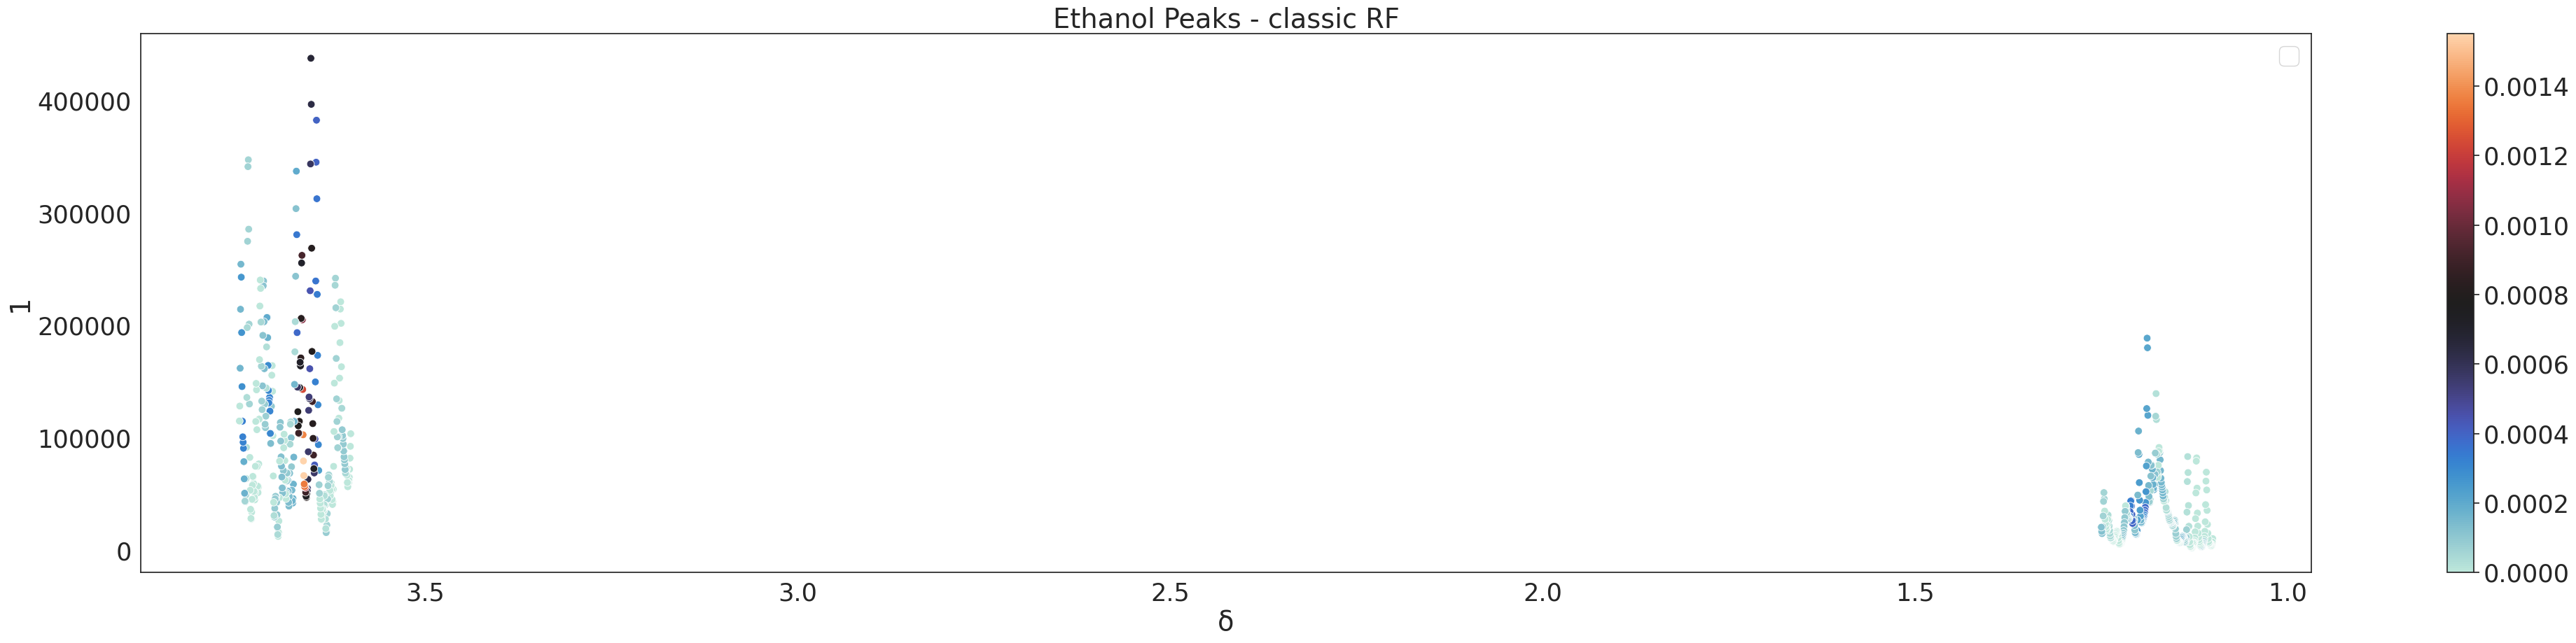

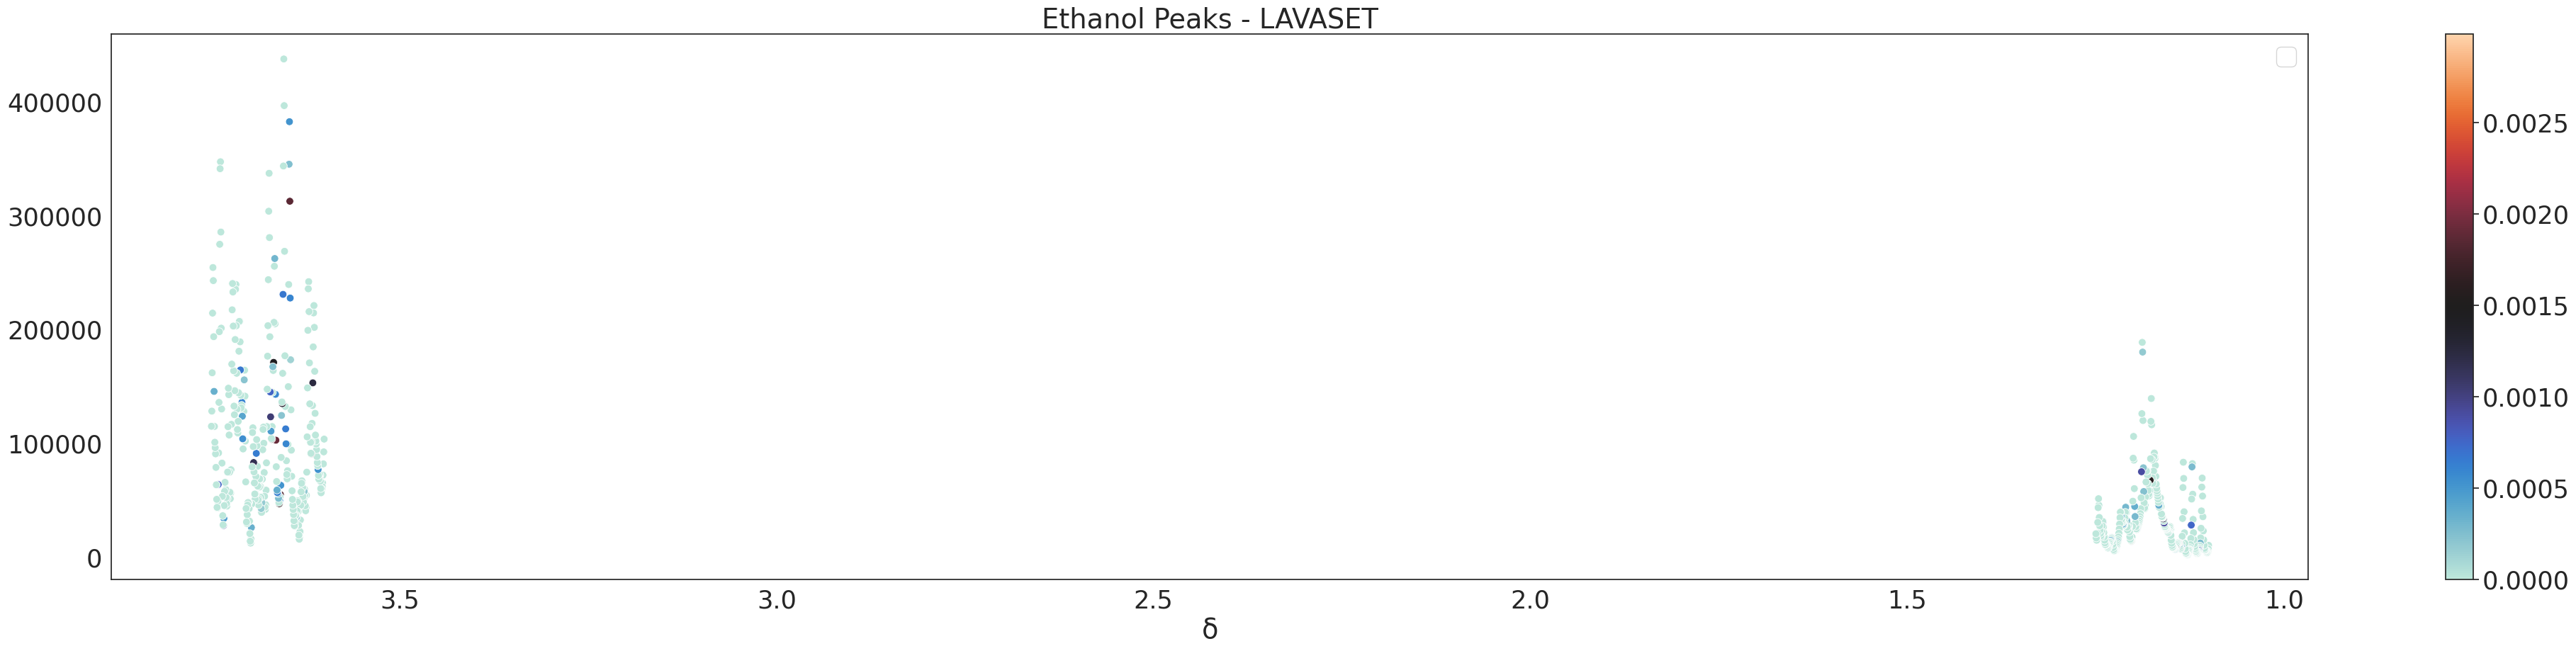

In [9]:
frange = range(1200,1500)
# df = pd.DataFrame({'1':nmr_peaks_avg[frange]})
# # df['2'] = list(range(0, nmr_peaks.iloc[1, :].shape[0]))  
# # df['gini importance'] = simgroups_100t10nn_lavaset.iloc[:, 2].values[frange]
# df['gini importance'] = (simgroups_100t10nn_lavaset.iloc[:, 2].values/np.sum(simgroups_100t10nn_lavaset.iloc[:,2]))[frange] # normalized by sum of all gini values 
# df['gini importance'] = df['gini importance']*100
# df['δ'] = x_axis[frange]

# # df = df[df['3']!=0]

# plt.figure(figsize=(50, 10))
# sns.set(font_scale=2.3,  style='white')
# # ax = sns.lineplot(y=nmr_peaks_avg[:4000], x=range(0, nmr_peaks.iloc[1, :4000].shape[0]),hue=importances[:4000], palette = palette)
# ax = sns.scatterplot(data=df,x=df['δ'],y=df['1'], hue='gini importance', palette='magma_r', s=60)
# norm = plt.Normalize(df['gini importance'].min(), df['gini importance'].max())
# sm = plt.cm.ScalarMappable(cmap="magma_r", norm=norm)
# sm.set_array([])
# ax.invert_xaxis()
# plt.legend('')
# # ax.get_legend()
# ax.figure.colorbar(sm)

plt.figure(figsize=(50, 10))
sns.set(font_scale=2.3,  style='white')

franges = [range(1200,1500), range(6200,6500)]  # ethanol ranges

dfs = []  # List to hold dataframes

for frange in franges:
    df = pd.DataFrame({'1':nmr_peaks_avg[frange]})
    df['gini importance'] = (lavaset_impo_100t10nn.iloc[:, 2].values/np.sum(lavaset_impo_100t10nn.iloc[:,2]))[frange]
    df['δ'] = x_axis[frange]
    dfs.append(df)

# Concatenate all dataframes
df_all = pd.concat(dfs, ignore_index=True)

# Create scatterplot
ax = sns.scatterplot(data=df_all, x=df_all['δ'], y=df_all['1'], hue='gini importance', palette='icefire', s=60)

norm = plt.Normalize(df_all['gini importance'].min(), df_all['gini importance'].max())
sm = plt.cm.ScalarMappable(cmap="icefire", norm=norm)
sm.set_array([])

ax.invert_xaxis()
plt.legend('')
plt.title('Ethanol Peaks - classic RF')
ax.figure.colorbar(sm)


plt.figure(figsize=(50, 10))
sns.set(font_scale=2.3,  style='white')

franges = [range(1200,1500), range(6200,6500)]  # ethanol ranges

dfs = []  # List to hold dataframes

for frange in franges:
    df = pd.DataFrame({'':nmr_peaks_avg[frange]})
    df['gini importance'] = (classicRF_impo_100t10nn.iloc[:, 2].values/np.sum(classicRF_impo_100t10nn.iloc[:,2]))[frange]
    df['δ'] = x_axis[frange]
    dfs.append(df)

# Concatenate all dataframes
df_all = pd.concat(dfs, ignore_index=True)


# Create scatterplot
ax = sns.scatterplot(data=df_all, x=df_all['δ'], y=df_all[''], hue='gini importance', palette='icefire', s=60)

norm = plt.Normalize(df_all['gini importance'].min(), df_all['gini importance'].max())
sm = plt.cm.ScalarMappable(cmap="icefire", norm=norm)
sm.set_array([])

ax.invert_xaxis()
plt.legend('')
plt.title('Ethanol Peaks - LAVASET')
ax.figure.colorbar(sm)



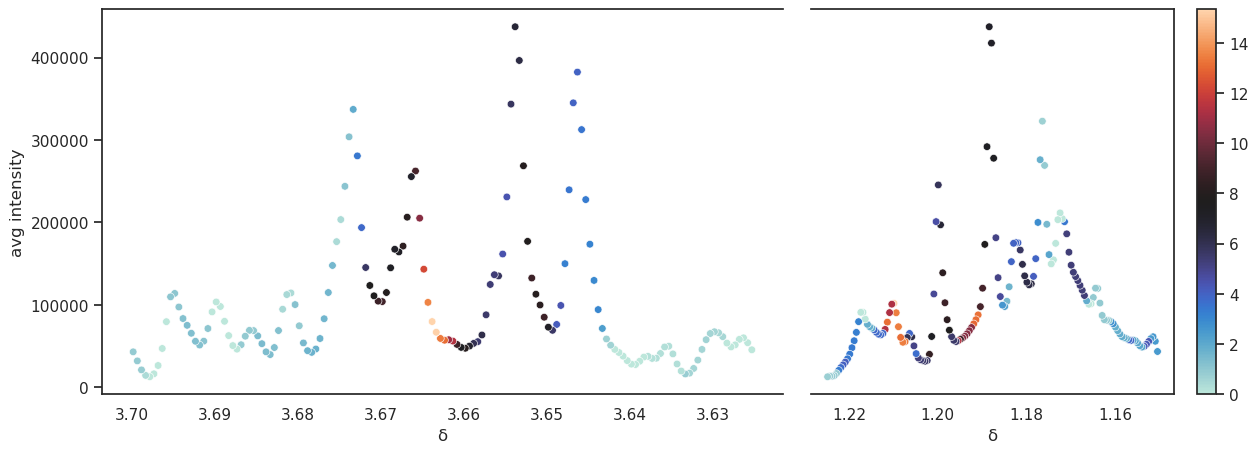

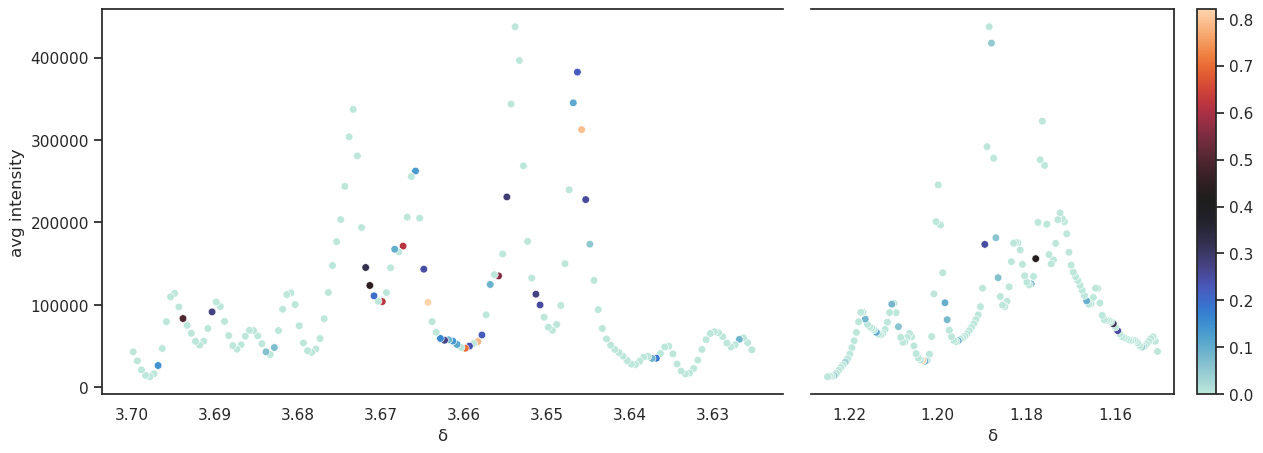

In [10]:
import matplotlib.gridspec as gridspec
# ax[1].set_ylabel('')

# Prepare your data
franges = [range(6285,6369), range(1345,1409)]  # ethanol ranges
franges = [range(6250,6400), range(1300,1450)]
dfs = []  

for frange in franges:
    df = pd.DataFrame({'1':nmr_peaks_avg[frange]})
    df['gini importance'] = lavaset_impo_100t10nn.iloc[:, 2].values[frange]
    df['δ'] = x_axis[frange]
    dfs.append(df)

# Concatenate all dataframes
df_all = pd.concat(dfs, ignore_index=True)
sns.set(font_scale=1,  style='white')

fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1, 2, width_ratios=[30, 20]) 

ax = []
for i in range(2):
    ax.append(plt.subplot(gs[i]))
    sns.scatterplot(data=dfs[i], x=dfs[i]['δ'], y=dfs[i]['1'], hue='gini importance', palette='icefire', s=30, ax=ax[i], legend=False)
    norm = plt.Normalize(df_all['gini importance'].min(), df_all['gini importance'].max())
    sm = plt.cm.ScalarMappable(cmap="icefire", norm=norm)
    sm.set_array([])
    ax[i].invert_xaxis()

# Hide the spines between ax[0] and ax[1]
ax[0].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[0].yaxis.tick_left()
ax[0].tick_params(labelright=False)
ax[1].tick_params(labelright=False, labelleft=False)
ax[0].set_ylabel('avg intensity')
ax[1].set_ylabel('')
ax[1].figure.colorbar(sm)

# Hide y-axis of the second subplot
plt.subplots_adjust(wspace=0.05)
plt.show()

dfs = []  
for frange in franges:
    df = pd.DataFrame({'1':nmr_peaks_avg[frange]})
    df['gini importance'] = classicRF_impo_100t10nn.iloc[:, 2].values[frange]
    df['δ'] = x_axis[frange]
    dfs.append(df)

# Concatenate all dataframes
df_all = pd.concat(dfs, ignore_index=True)
sns.set(font_scale=1,  style='white')

fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1, 2, width_ratios=[30, 20]) 

ax = []
for i in range(2):
    ax.append(plt.subplot(gs[i]))
    sns.scatterplot(data=dfs[i], x=dfs[i]['δ'], y=dfs[i]['1'], hue='gini importance', palette='icefire', s=30, ax=ax[i], legend=False)
    norm = plt.Normalize(df_all['gini importance'].min(), df_all['gini importance'].max())
    sm = plt.cm.ScalarMappable(cmap="icefire", norm=norm)
    sm.set_array([])
    ax[i].invert_xaxis()

# Hide the spines between ax[0] and ax[1]
ax[0].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[0].yaxis.tick_left()
ax[0].tick_params(labelright=False)
ax[1].tick_params(labelright=False, labelleft=False)
ax[0].set_ylabel('avg intensity')
ax[1].set_ylabel('')
ax[1].figure.colorbar(sm)

# Hide y-axis of the second subplot
plt.subplots_adjust(wspace=0.05)
plt.show()


In [106]:
classicRF_impo_100t10nn.iloc[:, 2].max()


0.8571428571428571

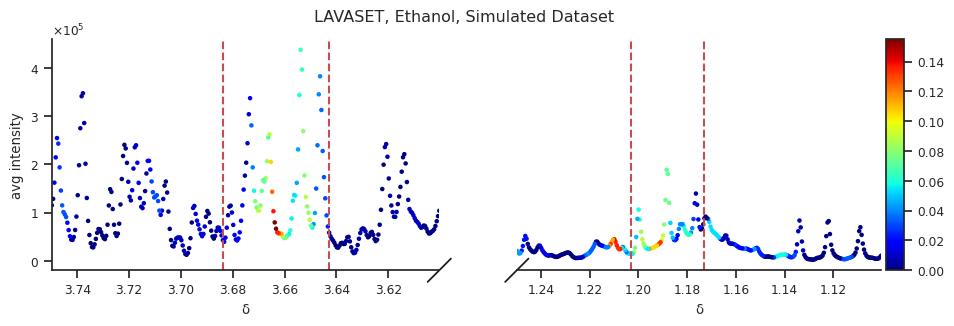

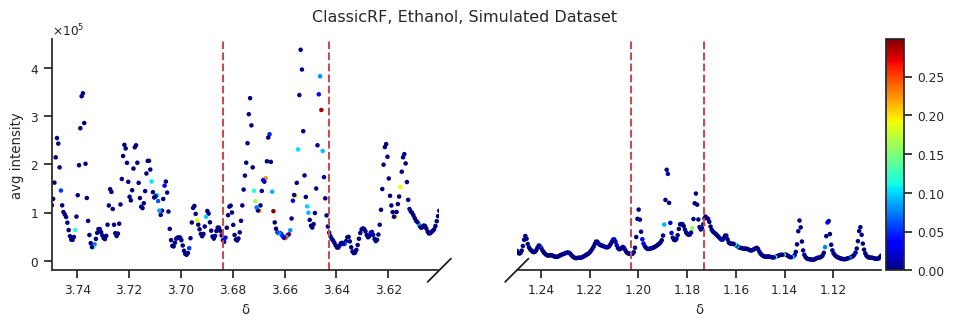

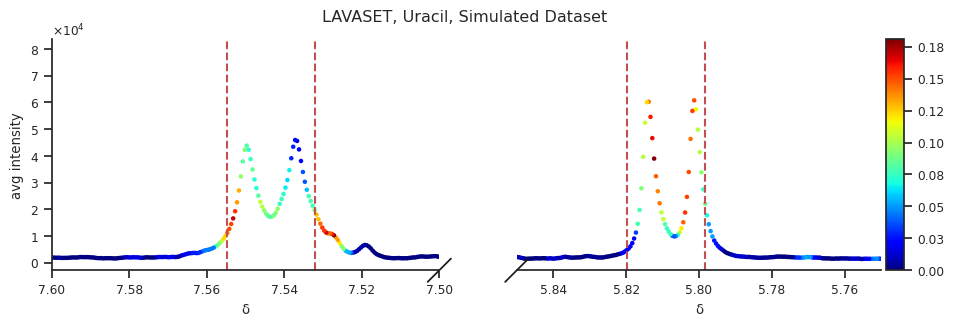

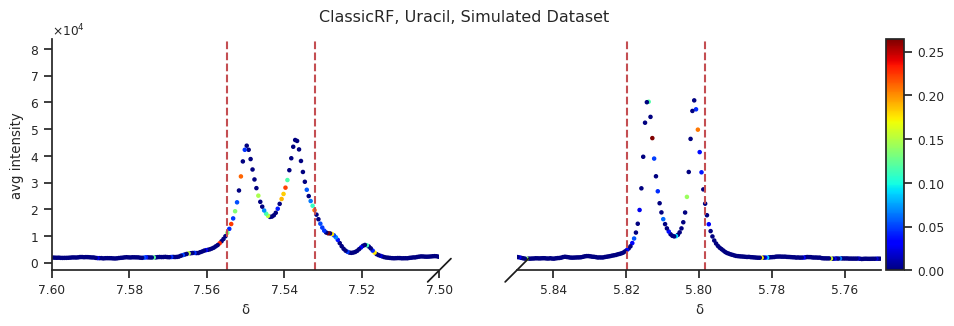

In [15]:
from brokenaxes import brokenaxes
import matplotlib.ticker as ticker

def make_broken_axes_plot(impo_df, frange, xlims, title, hor1, hor2, hor3, hor4):
    sns.set(font_scale=.8,  style='white')
    fig = plt.figure(figsize=(11,3))
    dfs = []  
    for frange in franges:
        df = pd.DataFrame({'1':nmr_peaks_avg[frange]})
        df['gini importance'] = impo_df.iloc[:, 2].values[frange]/np.sum(impo_df.iloc[:,2])*100
        # df['gini importance'] = impo_df['gini_normalized'][frange]
        df['δ'] = x_axis[frange]
        dfs.append(df)

    # Concatenate all dataframes
    df_all = pd.concat(dfs, ignore_index=True)

    # Create broken x-axis
    bax = brokenaxes(xlims=xlims, hspace=0.001)
    for df in dfs:
        bax.scatter(df['δ'], df['1'], c=df['gini importance'], cmap="jet", s=5)
        norm = plt.Normalize(df_all['gini importance'].min(), df_all['gini importance'].max())
        sm = plt.cm.ScalarMappable(cmap="jet", norm=norm)
        sm.set_array([])

    for ax in bax.axs:
        ax.axvline(x=hor1, color='r', linestyle='--') 
        ax.axvline(x=hor2, color='r', linestyle='--')
        ax.axvline(x=hor3, color='r', linestyle='--')
        ax.axvline(x=hor4, color='r', linestyle='--')
        if ax != bax.axs[0]:  # if not the last subplot
            ax.set_yticklabels([])  # remove y labels

    # set y label for the last subplot
    bax.axs[0].set_ylabel('avg intensity')
    bax.axs[0].set_xlabel('δ')
    bax.axs[-1].set_xlabel('δ')
    formatter = ticker.ScalarFormatter(useOffset=False, useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-3, 3))
    bax.axs[0].yaxis.set_major_formatter(formatter)

    formatter = ticker.FormatStrFormatter('%.1f')  # Set decimal precision to 1

    divider = make_axes_locatable(bax.axs[1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(sm, cax=cax, orientation='vertical')
    cax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))  # Set decimal precision to 1

    bax.invert_xaxis()
    fig.suptitle(title)
    plt.savefig('ethanol-uracil-peaks4.png')

    plt.show()

franges = [range(1200,1500), range(6200,6500)]  # ethanol ranges

make_broken_axes_plot(lavaset_impo_100t10nn, franges, ((3.6003, 3.7498), (1.1004, 1.2499)), 'LAVASET, Ethanol, Simulated Dataset', 1.172936, 3.683839, 1.202935, 3.642841)
make_broken_axes_plot(classicRF_impo_100t10nn, franges, ((3.6003, 3.7498), (1.1004, 1.2499)), 'ClassicRF, Ethanol, Simulated Dataset', 1.172936, 3.683839, 1.202935, 3.642841)

franges = [range(10100,10400), range(13400,13800)] # uracil 
make_broken_axes_plot(lavaset_impo_100t10nn, franges, ((7.500, 7.600), (5.750, 5.850)), 'LAVASET, Uracil, Simulated Dataset', 5.798258, 5.819757, 7.532191, 7.554690)
make_broken_axes_plot(classicRF_impo_100t10nn, franges, ((7.500, 7.600), (5.750, 5.850)), 'ClassicRF, Uracil, Simulated Dataset', 5.798258,5.819757, 7.532191, 7.554690)




In [28]:
display(clas_eth)
lav_eth

0    1         2  gini_normalized
1346  10.0  0.0  0.000000         0.000000
1347  10.0  0.0  0.000000         0.000000
1348  12.0  0.0  0.000000         0.000000
1349  14.0  0.0  0.000000         0.000000
1350  11.0  0.0  0.000000         0.000000
...    ...  ...       ...              ...
6364  15.0  0.0  0.000000         0.000000
6365  17.0  1.0  0.046485         0.016910
6366  10.0  0.0  0.000000         0.000000
6367  13.0  1.0  0.042025         0.015287
6368  14.0  0.0  0.000000         0.000000

[144 rows x 4 columns]

0    1         2  gini_normalized
1346   8.0  0.0  0.000000         0.000000
1347  11.0  0.0  0.000000         0.000000
1348   9.0  0.0  0.000000         0.000000
1349   9.0  1.0  0.610908         0.006173
1350   9.0  1.0  0.422114         0.004265
...    ...  ...       ...              ...
6364   9.0  2.0  1.210964         0.012236
6365  14.0  2.0  1.286353         0.012998
6366   9.0  2.0  1.333488         0.013475
6367   8.0  2.0  1.371160         0.013855
6368   9.0  2.0  1.400504         0.014152

[144 rows x 4 columns]

In [128]:
# 244 points in total 
lav_eth = lavaset_impo_100t10nn.iloc[ethanol_indeces[:50], :]
clas_eth = classicRF_impo_100t10nn.iloc[ethanol_indeces[:50], :]

lav_ur = lavaset_impo_100t10nn.iloc[uracil_indeces, :]
clas_ur = classicRF_impo_100t10nn.iloc[uracil_indeces, :]
display(lav_eth.shape, lav_ur.shape)
display(lav_eth[lav_eth.iloc[:, 1] != 0].shape) # number of points selected for split within the peaks
display(clas_eth[clas_eth.iloc[:, 1] != 0].shape)
(60/144)*100
display(lav_ur[lav_ur.iloc[:, 1] != 0].shape) # number of points selected for split within the peaks
display(clas_ur[clas_ur.iloc[:, 1] != 0].shape)

(50, 4)

(90, 4)

(47, 4)

(8, 4)

(90, 4)

(36, 4)

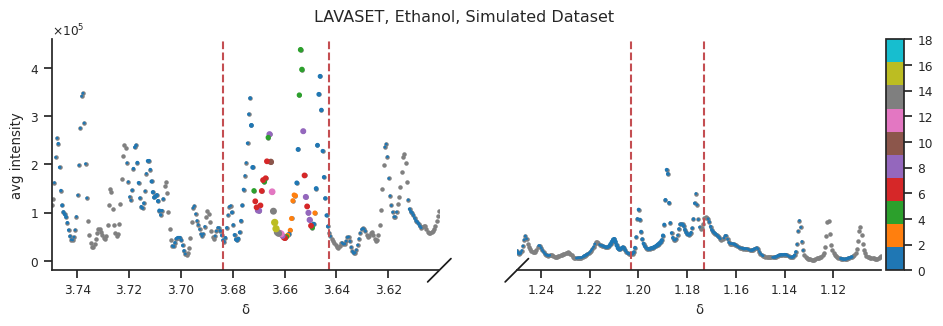

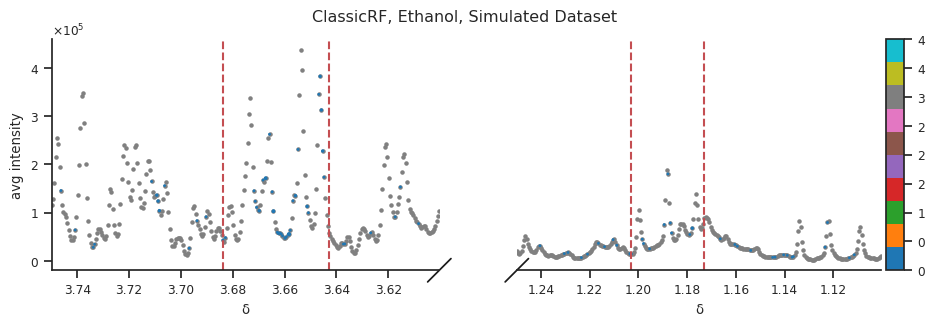

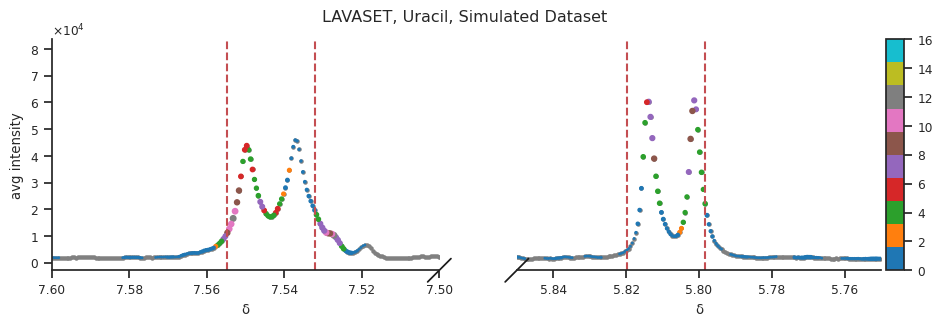

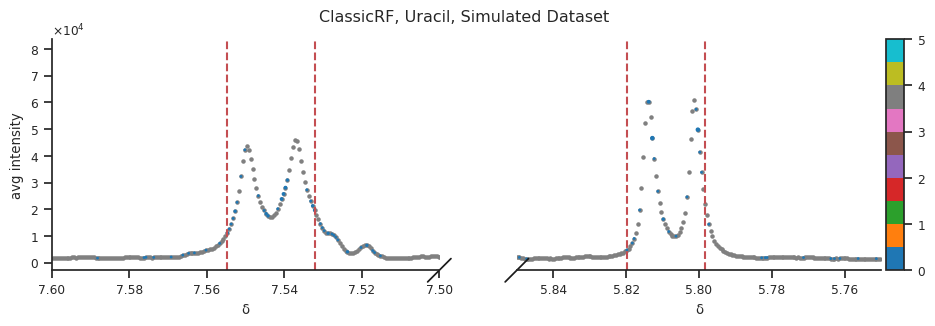

In [151]:
from brokenaxes import brokenaxes
import matplotlib.ticker as ticker

def make_broken_axes_plot_eval(impo_df, frange, xlims, title, hor1, hor2, hor3, hor4):
    sns.set(font_scale=.8,  style='white')
    fig = plt.figure(figsize=(11,3))
    dfs = []  
    for frange in franges:
        df = pd.DataFrame({'1':nmr_peaks_avg[frange]})
        df['gini importance'] = impo_df.iloc[:, 1].values[frange]#/np.sum(impo_df.iloc[:,1])*100
        # df['gini importance'] = impo_df['gini_normalized'][frange]
        df['δ'] = x_axis[frange]
        dfs.append(df)

    # Concatenate all dataframes
    df_all = pd.concat(dfs, ignore_index=True)

    # Create broken x-axis
    bax = brokenaxes(xlims=xlims, hspace=0.001)
    for df in dfs:
        sizes = df['gini importance']  # Assign the sizes based on the 'gini importance' column
        bax.scatter(df['δ'], df['1'], c='gray', s=5)
        bax.scatter(df['δ'], df['1'], c=df['gini importance'], cmap='tab10', s=sizes, vmin=5, vmax=20)
        norm = plt.Normalize(df_all['gini importance'].min(), df_all['gini importance'].max())
        sm = plt.cm.ScalarMappable(cmap="tab10", norm=norm)
        sm.set_array([])

    for ax in bax.axs:
        ax.axvline(x=hor1, color='r', linestyle='--') 
        ax.axvline(x=hor2, color='r', linestyle='--')
        ax.axvline(x=hor3, color='r', linestyle='--')
        ax.axvline(x=hor4, color='r', linestyle='--')
        if ax != bax.axs[0]:  # if not the last subplot
            ax.set_yticklabels([])  # remove y labels

    # set y label for the last subplot
    bax.axs[0].set_ylabel('avg intensity')
    bax.axs[0].set_xlabel('δ')
    bax.axs[-1].set_xlabel('δ')
    formatter = ticker.ScalarFormatter(useOffset=False, useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-3, 3))
    bax.axs[0].yaxis.set_major_formatter(formatter)

    formatter = ticker.FormatStrFormatter('%.1f')  # Set decimal precision to 1

    divider = make_axes_locatable(bax.axs[1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(sm, cax=cax, orientation='vertical')
    cax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))  # Set decimal precision to 1

    bax.invert_xaxis()
    fig.suptitle(title)
    # plt.savefig('ethanol-uracil-peaks4.png')

    plt.show()

franges = [range(1200,1500), range(6200,6500)]  # ethanol ranges

make_broken_axes_plot_eval(lavaset_impo_100t10nn, franges, ((3.6003, 3.7498), (1.1004, 1.2499)), 'LAVASET, Ethanol, Simulated Dataset', 1.172936, 3.683839, 1.202935, 3.642841)
make_broken_axes_plot_eval(classicRF_impo_100t10nn, franges, ((3.6003, 3.7498), (1.1004, 1.2499)), 'ClassicRF, Ethanol, Simulated Dataset', 1.172936, 3.683839, 1.202935, 3.642841)

franges = [range(10100,10400), range(13400,13800)] # uracil 
make_broken_axes_plot_eval(lavaset_impo_100t10nn, franges, ((7.500, 7.600), (5.750, 5.850)), 'LAVASET, Uracil, Simulated Dataset', 5.798258, 5.819757, 7.532191, 7.554690)
make_broken_axes_plot_eval(classicRF_impo_100t10nn, franges, ((7.500, 7.600), (5.750, 5.850)), 'ClassicRF, Uracil, Simulated Dataset', 5.798258,5.819757, 7.532191, 7.554690)




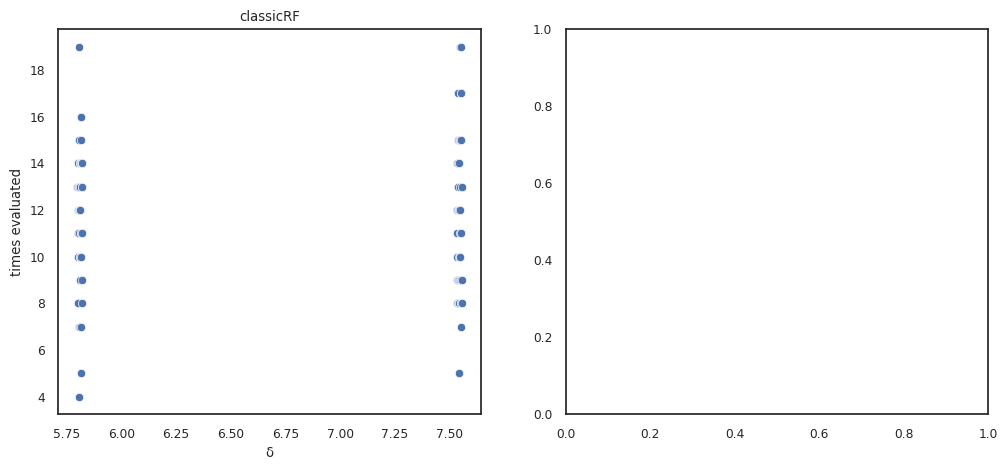

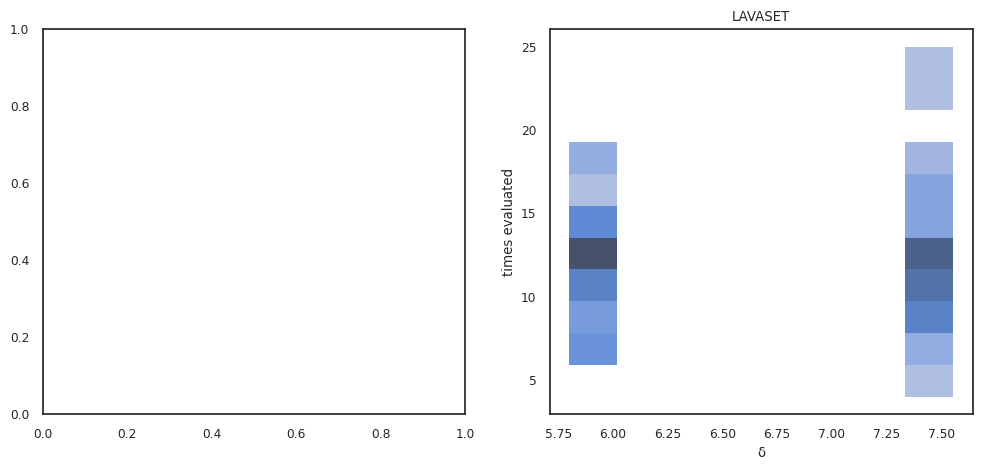

(90, 5)

In [130]:
sns.set(font_scale=.8,  style='white')

df = pd.DataFrame({'1':nmr_peaks_avg[uracil_indeces]/1000})
df['δ'] = x_axis[uracil_indeces]
df['times evaluated'] = clas_ur.iloc[:, 0].to_list()
df['times selected']= clas_ur.iloc[:, 1].to_list()
df['gini importance']= clas_ur.iloc[:, 3].to_list()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(ax=axes[0], data=df, x=df['δ'], y=df['times evaluated'])
axes[0].set_title('classicRF')  # Title for first plot
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df = pd.DataFrame({'1':nmr_peaks_avg[uracil_indeces]/1000})
df['δ'] = x_axis[uracil_indeces]
df['times evaluated'] = lav_ur.iloc[:, 0].to_list()
df['times selected']= lav_ur.iloc[:, 1].to_list()
df['gini importance']= lav_ur.iloc[:, 3].to_list()

sns.histplot(ax=axes[1], data=df, x=df['δ'], y=df['times evaluated'])
axes[1].set_title('LAVASET')  # Title for first plot
plt.show()
df.shape







In [ ]:
cmr = pd.read_csv('HCM_HC_cmr_test.csv')
X = np.array(cmr.iloc[:, 1:-1])
y = np.array(cmr.iloc[:, -1])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
# print(pd.DataFrame(X_train))

df_train = pd.DataFrame(X_train)
display(df_train.shape)
df_test = pd.DataFrame(X_test)


In [ ]:
heart_hc = pd.read_csv(
    '../CMR_WT/27k_WT_txts/1008480_lv_myoed_wallthickness.txt', sep=" ", header=None)
x = np.array(heart_hc.iloc[:, 0])
y = np.array(heart_hc.iloc[:, 1])
z = np.array(heart_hc.iloc[:, 2])
wt = np.array(cmr_importances)*100

fig = plt.figure(1, figsize=(15,10))
ax = plt.axes(projection="3d")
# wt = np.array(heart_hcm.iloc[:, 3][:20])
sc = ax.scatter(x, y, z, s=1, depthshade=True, c=wt, cmap='YlGnBu')
plt.title('Important Features')
plt.colorbar(sc)
plt.show()
#fig.savefig('3dventr.svg', format='svg', dpi=1200)

heart_hcm = pd.read_csv(
    '../CMR_WT/27k_WT_txts/1008480_lv_myoed_wallthickness.txt', sep=" ", header=None)
x = np.array(heart_hcm.iloc[:, 0])
y = np.array(heart_hcm.iloc[:, 1])
z = np.array(heart_hcm.iloc[:, 2])
wt = np.array(heart_hcm.iloc[:, 3])

fig = plt.figure(1, figsize=(15,10))
ax = plt.axes(projection="3d")
# wt = np.array(heart_hcm.iloc[:, 3][:20])
sc = ax.scatter(x, y, z, s=3, depthshade=True, c=wt, cmap='YlGnBu')
plt.title('HC')
plt.colorbar(sc)
plt.show()


heart_hcm = pd.read_csv(
    '../CMR_WT/27k_WT_txts/1985320_lv_myoed_wallthickness.txt', sep=" ", header=None)
x = np.array(heart_hcm.iloc[:, 0])
y = np.array(heart_hcm.iloc[:, 1])
z = np.array(heart_hcm.iloc[:, 2])
wt = np.array(heart_hcm.iloc[:, 3])

fig = plt.figure(1, figsize=(15,10))
ax = plt.axes(projection="3d")
# wt = np.array(heart_hcm.iloc[:, 3][:20])
sc = ax.scatter(x, y, z, s=1, depthshade=True, c=wt, cmap='YlGnBu')
plt.title('HCM')
plt.colorbar(sc)
plt.show()
#fig.savefig('3dventr.svg', format='svg', dpi=1200)

In [7]:
 nmr_peaks.columns[3:]

Index(['HC,IBS-subtypes=1-4', '0.5005', '0.5010', '0.5015', '0.5020', '0.5025',
       '0.5030', '0.5035', '0.5040', '0.5045',
       ...
       '9.9951', '9.9956', '9.9961', '9.9966', '9.9971', '9.9976', '9.9981',
       '9.9986', '9.9991', '9.9996'],
      dtype='object', length=18601)

In [21]:
X = nmr_peaks.columns[3:15].to_numpy(dtype=float)
display(X.shape)
if X.ndim == 1:
    print('its 1D vector')
X = np.append([X], [nmr_peaks.columns[3:15].to_numpy(dtype=float)], axis=0)
display(X.T.shape)


kdtree = KDTree(X.T)
# logging.warning('here')
points = kdtree.query(X.T,11)[1]
display(points)


X = nmr_peaks.iloc[:, 3:15].to_numpy(dtype=float)
# X = np.append([X], [nmr_peaks.iloc[:, 3:15].to_numpy(dtype=float)], axis=0)
display(X.T)
kdtree = KDTree(X.T)
# logging.warning('here')
dist, points = kdtree.query(X.T,11)
points
# pd.DataFrame(points).to_csv('nmr_20nn_index.csv', index=False)

(12,)

its 1D vector


(12, 2)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 1,  2,  0,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  1,  3,  4,  0,  5,  6,  7,  8,  9, 10],
       [ 3,  4,  2,  5,  1,  6,  0,  7,  8,  9, 10],
       [ 4,  3,  5,  6,  2,  1,  7,  8,  0,  9, 10],
       [ 5,  6,  4,  7,  3,  8,  2,  9,  1, 10,  0],
       [ 6,  5,  7,  4,  8,  3,  9, 10,  2,  1, 11],
       [ 7,  8,  6,  5,  9, 10,  4, 11,  3,  2,  1],
       [ 8,  7,  9, 10,  6,  5, 11,  4,  3,  2,  1],
       [ 9, 10,  8, 11,  7,  6,  5,  4,  3,  2,  1],
       [10,  9, 11,  8,  7,  6,  5,  4,  3,  2,  1],
       [11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1]])

array([[1415.89933793, 1549.12559854, 2603.7116221 , ...,  384.94461213,
        3332.68181595, 2705.9750194 ],
       [2055.33199565, 1580.09031374, 1657.46492921, ..., 2222.58399632,
        2629.89110155,  549.29988136],
       [1780.55556829, 1484.27424158,  488.54208113, ..., 1390.41659581,
        2009.07195417, 1175.1821884 ],
       ...,
       [1734.25050985, 2619.78798822, 2003.0444541 , ..., 1459.23774301,
        1639.05816296, 1895.47111043],
       [1338.70535688, 3328.78592419, 2386.64537548, ..., 1508.57083831,
        2332.93544085, 1688.5567775 ],
       [2083.44363037, 2106.11903714, 3442.96621659, ..., 3116.93092119,
        1893.03288807,  982.96956783]])

array([[ 0,  1,  7,  2,  4,  3, 10,  8,  9,  6, 11],
       [ 1,  2,  0,  3,  4,  7,  6, 11, 10,  5,  9],
       [ 2,  3,  1,  4,  0,  6,  7,  9,  5, 10,  8],
       [ 3,  4,  2,  1,  5,  9,  6,  7, 10,  8,  0],
       [ 4,  3,  5,  6,  7,  2,  1, 10,  9,  8,  0],
       [ 5,  4,  6,  3,  7,  8,  9,  1, 10,  2, 11],
       [ 6,  7,  5,  8,  4,  3,  9,  2,  1, 10, 11],
       [ 7,  6,  8,  9,  4,  3,  5, 10,  0,  1, 11],
       [ 8,  9,  7,  6, 10,  5,  3,  4,  0,  1,  2],
       [ 9,  8, 10,  7,  3, 11,  6,  4,  5,  1,  2],
       [10, 11,  9,  3,  4,  8,  7,  6,  1,  0,  5],
       [11, 10,  9,  1,  6,  7,  4,  3,  0,  8,  5]])

In [ ]:
heart_hc = pd.read_csv(
    '../CMR_WT/27k_WT_txts/1008480_lv_myoed_wallthickness.txt', sep=" ", header=None)
heart_hcm = pd.read_csv(
    '../CMR_WT/27k_WT_txts/1985320_lv_myoed_wallthickness.txt', sep=" ", header=None)

In [ ]:
X = heart_hc.iloc[:, :-1]
# print(X.iloc[2])
#X = (np.array(data.iloc[0, :])).flatten()

kdtree = KDTree(X)
# logging.warning('here')
dist, points = kdtree.query(X,101)
print(points)
pd.DataFrame(points).to_csv('cmr_100nn_index.csv', index=False)



In [ ]:
x_axis = nmr_peaks.columns.astype('float')
nmr_peaks_avg = nmr_peaks.mean(axis=0)


In [ ]:
frange = range(12000,14000)
df = pd.DataFrame({'1':nmr_peaks_avg[frange]})
# df['2'] = list(range(0, nmr_peaks.iloc[1, :].shape[0]))  
df['gini importance'] = importances3.values[frange]
df['gini importance'] = df['gini importance']*100
df['δ'] = x_axis[frange]

# df = df[df['3']!=0]
fig = plt.figure(figsize=(20, 10))
sns.set(font_scale=1.3,  style='white')
# ax = sns.lineplot(y=nmr_peaks_avg[:4000], x=range(0, nmr_peaks.iloc[1, :4000].shape[0]),hue=importances[:4000], palette = palette)
ax = sns.scatterplot(data=df,x=df['δ'],y=df['1'], hue='gini importance', palette='gnuplot', s=30)
norm = plt.Normalize(df['gini importance'].min(), df['gini importance'].max())
sm = plt.cm.ScalarMappable(cmap="gnuplot", norm=norm)
sm.set_array([])
# here the pink peak is isoleucine 


plt.ylabel('')
plt.legend('')
# ax.get_legend()
ax.figure.colorbar(sm)
#fig.savefig('isoleucine.tiff', format='tiff')

df = pd.DataFrame({'1':nmr_peaks_avg[frange]})
# df['2'] = list(range(0, nmr_peaks.iloc[1, :].shape[0]))  
df['gini importance'] = importances4.values[frange]
df['gini importance'] = df['gini importance']*100
df['δ'] = x_axis[frange]



# df = df[df['3']!=0]
display(df['gini importance'].max())
plt.figure(figsize=(20, 10))
# ax = sns.lineplot(y=nmr_peaks_avg[:4000], x=range(0, nmr_peaks.iloc[1, :4000].shape[0]),hue=importances[:4000], palette = palette)
ax = sns.scatterplot(data=df,x=df['δ'],y=df['1'], hue='gini importance', palette='gnuplot', s=30)
norm = plt.Normalize(df['gini importance'].min(), df['gini importance'].max())
sm = plt.cm.ScalarMappable(cmap="gnuplot", norm=norm)
sm.set_array([])
plt.ylabel('')
plt.legend('')
# ax.get_legend()
ax.figure.colorbar(sm)




In [ ]:
#frange = range(500,1500)
df = pd.DataFrame({'1':nmr_peaks_avg})
# df['2'] = list(range(0, nmr_peaks.iloc[1, :].shape[0]))  
df['gini importance'] = importances3.values
df['gini importance'] = df['gini importance']*100
df['δ'] = x_axis
# df = df[df['3']!=0]
fig = plt.figure(figsize=(30, 10))
sns.set(font_scale=1.3,  style='white')
# ax = sns.lineplot(y=nmr_peaks_avg[:4000], x=range(0, nmr_peaks.iloc[1, :4000].shape[0]),hue=importances[:4000], palette = palette)
ax = sns.scatterplot(data=df,x=df['δ'],y=df['1'], hue='gini importance', palette='gnuplot', s=30)
norm = plt.Normalize(df['gini importance'].min(), df['gini importance'].max())
sm = plt.cm.ScalarMappable(cmap="gnuplot", norm=norm)
sm.set_array([])
# here the pink peak is isoleucine 


plt.ylabel('')
plt.legend('')
# ax.get_legend()
ax.figure.colorbar(sm)
#fig.savefig('isoleucine.tiff', format='tiff')

df = pd.DataFrame({'1':nmr_peaks_avg})
# df['2'] = list(range(0, nmr_peaks.iloc[1, :].shape[0]))  
df['gini importance'] = importances4.values
df['gini importance'] = df['gini importance']*100
df['δ'] = x_axis
# df = df[df['3']!=0]
display(df['gini importance'].max())
plt.figure(figsize=(30, 10))
# ax = sns.lineplot(y=nmr_peaks_avg[:4000], x=range(0, nmr_peaks.iloc[1, :4000].shape[0]),hue=importances[:4000], palette = palette)
ax = sns.scatterplot(data=df,x=df['δ'],y=df['1'], hue='gini importance', palette='gnuplot', s=30)
norm = plt.Normalize(df['gini importance'].min(), df['gini importance'].max())
sm = plt.cm.ScalarMappable(cmap="gnuplot", norm=norm)
sm.set_array([])
plt.ylabel('')
plt.legend('')
# ax.get_legend()
ax.figure.colorbar(sm)


In [ ]:
df = pd.DataFrame({'1':nmr_peaks_avg})
df['2'] = list(range(0, nmr_peaks_10k15k.iloc[1, :].shape[0]))  
df['3'] = importances.values
df['3'] = df['3']



# df = df[df['3']!=0]
display(df['3'].max())
plt.figure(figsize=(30, 10))
# ax = sns.lineplot(y=nmr_peaks_avg[:4000], x=range(0, nmr_peaks.iloc[1, :4000].shape[0]),hue=importances[:4000], palette = palette)
ax = sns.scatterplot(data=df,x='2',y='1', hue='3', palette='gnuplot', s=30)
norm = plt.Normalize(df['3'].min(), df['3'].max())
sm = plt.cm.ScalarMappable(cmap="gnuplot", norm=norm)
sm.set_array([])

ax.get_legend()
ax.figure.colorbar(sm)
display(df)

In [ ]:
nmr_peaks = pd.read_csv('~/Documents/IBS/NMR_data/IBS_HNMR_data_n267.csv').iloc[:, 3:]
impo_sk = pd.read_csv('feature_impo_pca_15_all_features.csv').iloc[:, 1:]
nmr_peaks_avg = nmr_peaks.mean(axis=0)
frange = range(1500,2500)
df = pd.DataFrame({'1':nmr_peaks_avg[frange]})
df['2'] = list(range(0, nmr_peaks.iloc[1, frange].shape[0]))  
df['3'] = impo_sk.values[frange]
df['3'] = df['3']*100

# df = df[df['3']!=0]
display(df['3'].max())
plt.figure(figsize=(20, 10))
# ax = sns.lineplot(y=nmr_peaks_avg[:4000], x=range(0, nmr_peaks.iloc[1, :4000].shape[0]),hue=importances[:4000], palette = palette)
ax = sns.scatterplot(data=df,x='2',y='1', hue='3', palette='gnuplot', s=30)
norm = plt.Normalize(df['3'].min(), df['3'].max())
sm = plt.cm.ScalarMappable(cmap="gnuplot", norm=norm)
sm.set_array([])

ax.get_legend()
ax.figure.colorbar(sm)


impo_sk = pd.read_csv('feature_impo_pca_100_all_features.csv').iloc[:, 1:]
nmr_peaks_avg = nmr_peaks.mean(axis=0)
frange = range(1500,2500)
df = pd.DataFrame({'1':nmr_peaks_avg[frange]})
df['2'] = list(range(0, nmr_peaks.iloc[1, frange].shape[0]))  
df['3'] = impo_sk.values[frange]
df['3'] = df['3']*100

# df = df[df['3']!=0]
display(df['3'].max())
plt.figure(figsize=(20, 10))
# ax = sns.lineplot(y=nmr_peaks_avg[:4000], x=range(0, nmr_peaks.iloc[1, :4000].shape[0]),hue=importances[:4000], palette = palette)
ax = sns.scatterplot(data=df,x='2',y='1', hue='3', palette='gnuplot', s=30)
norm = plt.Normalize(df['3'].min(), df['3'].max())
sm = plt.cm.ScalarMappable(cmap="gnuplot", norm=norm)
sm.set_array([])

ax.get_legend()
ax.figure.colorbar(sm)

In [ ]:
nmr_peaks = pd.read_csv('~/Documents/IBS/NMR_data/IBS_HNMR_data_n267.csv').iloc[:, 3:]
impo_sk = pd.read_csv('feature_impo_pca_10t50nn.csv').iloc[:, 1:]
nmr_peaks_avg = nmr_peaks.mean(axis=0)
frange = range(12000,14000)
df = pd.DataFrame({'1':nmr_peaks_avg[frange]})
df['2'] = list(range(0, nmr_peaks.iloc[1, frange].shape[0]))  
df['3'] = impo_sk.values[frange]
df['3'] = df['3']*100

# df = df[df['3']!=0]
plt.figure(figsize=(20, 10))
# ax = sns.lineplot(y=nmr_peaks_avg[:4000], x=range(0, nmr_peaks.iloc[1, :4000].shape[0]),hue=importances[:4000], palette = palette)
ax = sns.scatterplot(data=df,x='2',y='1', hue='3', palette='gnuplot', s=30)
norm = plt.Normalize(df['3'].min(), df['3'].max())
sm = plt.cm.ScalarMappable(cmap="gnuplot", norm=norm)
sm.set_array([])

ax.get_legend()
ax.figure.colorbar(sm)


impo_sk = pd.read_csv('feature_impo_pca_100_all_features.csv').iloc[:, 1:]
nmr_peaks_avg = nmr_peaks.mean(axis=0)
frange = range(12000,14000)
df = pd.DataFrame({'1':nmr_peaks_avg[frange]})
df['2'] = list(range(0, nmr_peaks.iloc[1, frange].shape[0]))  
df['3'] = impo_sk.values[frange]
df['3'] = df['3']*100

# df = df[df['3']!=0]
display(df['3'].max())
plt.figure(figsize=(20, 10))
# ax = sns.lineplot(y=nmr_peaks_avg[:4000], x=range(0, nmr_peaks.iloc[1, :4000].shape[0]),hue=importances[:4000], palette = palette)
ax = sns.scatterplot(data=df,x='2',y='1', hue='3', palette='gnuplot', s=30)
norm = plt.Normalize(df['3'].min(), df['3'].max())
sm = plt.cm.ScalarMappable(cmap="gnuplot", norm=norm)
sm.set_array([])

ax.get_legend()
ax.figure.colorbar(sm)

In [8]:
nmr_peaks = pd.read_csv('~/Documents/IBS/NMR_data/IBS_HNMR_data_n267.csv').iloc[:, 3:]
impo_sk = pd.read_csv('feature_impo_pca_15_all_features.csv').iloc[:, 1:]
nmr_peaks_avg = nmr_peaks.mean(axis=0)

df = pd.DataFrame({'1':nmr_peaks_avg[2000:4000]})
df['2'] = list(range(0, nmr_peaks.iloc[1, 2000:4000].shape[0]))  
df['3'] = impo_sk.values[2000:4000]
df['3'] = df['3']*100

# df = df[df['3']!=0]
display(df['3'].max())
plt.figure(figsize=(50, 10))
# ax = sns.lineplot(y=nmr_peaks_avg[:4000], x=range(0, nmr_peaks.iloc[1, :4000].shape[0]),hue=importances[:4000], palette = palette)
ax = sns.scatterplot(data=df,x='2',y='1', hue='3', palette='gnuplot', s=30)
norm = plt.Normalize(df['3'].min(), df['3'].max())
sm = plt.cm.ScalarMappable(cmap="gnuplot", norm=norm)
sm.set_array([])

ax.get_legend()
ax.figure.colorbar(sm)
display(df)

FileNotFoundError: [Errno 2] No such file or directory: 'feature_impo_pca_15_all_features.csv'

In [ ]:
nmr_peaks = pd.read_csv('~/Documents/IBS/NMR_data/IBS_HNMR_data_n267.csv').iloc[:, 3:]
impo_sk = pd.read_csv('feature_impo_pca_10_all_features.csv').iloc[:, 1:]
nmr_peaks_avg = nmr_peaks.mean(axis=0)

df = pd.DataFrame({'1':nmr_peaks_avg[2000:4000]})
df['2'] = list(range(0, nmr_peaks.iloc[1, 2000:4000].shape[0]))  
df['3'] = impo_sk.values[2000:4000]
df['3'] = df['3']*100

# df = df[df['3']!=0]
display(df['3'].max())
plt.figure(figsize=(50, 10))
# ax = sns.lineplot(y=nmr_peaks_avg[:4000], x=range(0, nmr_peaks.iloc[1, :4000].shape[0]),hue=importances[:4000], palette = palette)
ax = sns.scatterplot(data=df,x='2',y='1', hue='3', palette='gnuplot', s=30)
norm = plt.Normalize(df['3'].min(), df['3'].max())
sm = plt.cm.ScalarMappable(cmap="gnuplot", norm=norm)
sm.set_array([])

ax.get_legend()
ax.figure.colorbar(sm)
display(df)

In [ ]:
nmr_peaks = pd.read_csv('~/Documents/IBS/NMR_data/IBS_HNMR_data_n267.csv').iloc[:, 3:]
impo_sk = pd.read_csv('feature_impo_10_all_features.csv').iloc[:, 1:]
nmr_peaks_avg = nmr_peaks.mean(axis=0)

df = pd.DataFrame({'1':nmr_peaks_avg[2000:5000]})
df['2'] = list(range(0, nmr_peaks.iloc[1, 2000:5000].shape[0]))  
df['3'] = impo_sk.values[2000:5000]
df['3'] = df['3']*100



# df = df[df['3']!=0]
display(df['3'].max())
plt.figure(figsize=(50, 10))
# ax = sns.lineplot(y=nmr_peaks_avg[:4000], x=range(0, nmr_peaks.iloc[1, :4000].shape[0]),hue=importances[:4000], palette = palette)
ax = sns.scatterplot(data=df,x='2',y='1', hue='3', palette='gnuplot', s=30)
norm = plt.Normalize(df['3'].min(), df['3'].max())
sm = plt.cm.ScalarMappable(cmap="gnuplot", norm=norm)
sm.set_array([])

ax.get_legend()
ax.figure.colorbar(sm)
display(df)

In [ ]:
nmr_peaks.iloc[1, 10000:150000]

In [ ]:
leaves_lavaset = pd.read_csv('bonsai-dt/bonsai/leaves_lavaset10v2.csv')
# for i in leaves_lavaset['eqs'][:100]:
#     print(i)
leaves_lavaset.iloc[1, 1]

In [ ]:
leaves_lavaset.iloc[2, 1]

In [ ]:
nmr_peaks_avg = nmr_peaks.mean(axis=0)
# nmr_peaks_avg.index

In [ ]:
importances = pd.read_csv('bonsai-dt/bonsai/feature_impo_pca_RF10_v2.csv').iloc[:, 1:]
df = pd.DataFrame({'1':nmr_peaks_avg})
df['2'] = list(range(0, nmr_peaks.iloc[1, :].shape[0]))  
df['3'] = importances.values
df['3'] = df['3']



df = df[df['3']!=0]
display(df['3'].max())
plt.figure(figsize=(30, 10))
# ax = sns.lineplot(y=nmr_peaks_avg[:4000], x=range(0, nmr_peaks.iloc[1, :4000].shape[0]),hue=importances[:4000], palette = palette)
ax = sns.scatterplot(data=df,x='2',y='1', hue='3', palette='viridis', s=10)
norm = plt.Normalize(df['3'].min(), df['3'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

ax.get_legend()
ax.figure.colorbar(sm)
display(df)

In [ ]:
# fig = plt.figure(figsize=(15, 10))
# sns.lineplot(y=nmr_peaks_avg[:4000], x=range(0, nmr_peaks_avg[:4000].shape[0]))
# fig.savefig('specturm.svg', format='svg', dpi=1200)

heart_hcm = pd.read_csv(
    '../CMR_WT/27k_WT_txts/1985320_lv_myoed_wallthickness.txt', sep=" ", header=None)
x = np.array(heart_hcm.iloc[:, 0])
y = np.array(heart_hcm.iloc[:, 1])
z = np.array(heart_hcm.iloc[:, 2])
wt = np.array(heart_hcm.iloc[:, 3])

fig = plt.figure(1, figsize=(15,10))
ax = plt.axes(projection="3d")
# wt = np.array(heart_hcm.iloc[:, 3][:20])
sc = ax.scatter(x, y, z, s=1, depthshade=True, c=wt, cmap='YlGnBu')
# plt.title('HCM')
# plt.colorbar(sc)
plt.show()
fig.savefig('3dventr.svg', format='svg', dpi=1200)




In [ ]:
importances[:4000]['0'].unique()

In [ ]:
unique = importances[:4000]['0'].unique()
display(unique)
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))


In [ ]:
from sklearn.metrics import accuracy_score
test = [1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0]
pred = [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0]
print(accuracy_score(test, pred))

In [ ]:
df = pd.DataFrame({'1':nmr_peaks_avg[0:2500]})
df['2'] = list(range(0, nmr_peaks.iloc[1, 0:2500].shape[0]))  
df['3'] = importances.values[0:2500]
df

# df = pd.DataFrame({'1':nmr_peaks_avg})
# df['2'] = list(range(0, nmr_peaks.iloc[1, :].shape[0]))  
# df['3'] = importances.values
# df

# df = df[df['3']!=0].reset_index()
df['3'] = df['3']*1000
df

In [ ]:
df = pd.DataFrame({'1':nmr_peaks_avg[0:2500]})
df['2'] = list(range(0, nmr_peaks.iloc[1, 0:2500].shape[0]))  
df['3'] = importances.values[0:2500]
df['3'] = df['3']*1000

display(df[2400:2500])

df = df[df['3']!=0]
display(df['3'].max())
plt.figure(figsize=(30, 10))
# ax = sns.lineplot(y=nmr_peaks_avg[:4000], x=range(0, nmr_peaks.iloc[1, :4000].shape[0]),hue=importances[:4000], palette = palette)
ax = sns.scatterplot(data=df,x='2',y='1', hue='3', palette='Spectral', s=10)
# norm = plt.Normalize(df['3'].min(), df['3'].max())
# sm = plt.cm.ScalarMappable(cmap="Spectral", norm=norm)
# sm.set_array([])

ax.get_legend()
ax.figure.colorbar(sm)

In [ ]:
df = pd.DataFrame({'1':nmr_peaks_avg[2500:5000]})
df['2'] = list(range(0, nmr_peaks.iloc[1, 2500:5000].shape[0]))  
df['3'] = importances.values[2500:5000]
# df['3'] = df['3']*1000
display(df)

df = df[df['3']!=0]
display(df['3'].max())
plt.figure(figsize=(30, 10))
# ax = sns.lineplot(y=nmr_peaks_avg[:4000], x=range(0, nmr_peaks.iloc[1, :4000].shape[0]),hue=importances[:4000], palette = palette)
ax = sns.scatterplot(data=df,x='2',y='1', hue='3', palette='Spectral', s=10)
# norm = plt.Normalize(df['3'].min(), df['3'].max())
# sm = plt.cm.ScalarMappable(cmap="Spectral", norm=norm)
# sm.set_array([])

ax.get_legend()
ax.figure.colorbar(sm)

In [ ]:
df = pd.DataFrame({'1':nmr_peaks_avg[5000:10000]})
df['2'] = list(range(0, nmr_peaks.iloc[1, 5000:10000].shape[0]))  
df['3'] = importances.values[5000:10000]
# df['3'] = df['3']*1000
display(df)

df = df[df['3']!=0]
display(df['3'].max())
plt.figure(figsize=(30, 10))
# ax = sns.lineplot(y=nmr_peaks_avg[:4000], x=range(0, nmr_peaks.iloc[1, :4000].shape[0]),hue=importances[:4000], palette = palette)
ax = sns.scatterplot(data=df,x='2',y='1', hue='3', palette='Spectral', s=10)
norm = plt.Normalize(df['3'].min(), df['3'].max())
sm = plt.cm.ScalarMappable(cmap="Spectral", norm=norm)
sm.set_array([])

ax.get_legend()
ax.figure.colorbar(sm)

In [ ]:
df = pd.DataFrame({'1':nmr_peaks_avg[11:18588]})
df['2'] = list(range(0, nmr_peaks.iloc[1, 11:18588].shape[0]))  
df['3'] = importances.values[11:18588]
# df['3'] = df['3']*1000
display(df)

df = df[df['3']!=0]
display(df['3'].min())
display(df['3'].max())
plt.figure(figsize=(30, 10))
# ax = sns.lineplot(y=nmr_peaks_avg[:4000], x=range(0, nmr_peaks.iloc[1, :4000].shape[0]),hue=importances[:4000], palette = palette)
ax = sns.scatterplot(data=df,x='2',y='1', hue='3', palette='viridis', s=10)
norm = plt.Normalize(df['3'].min(), df['3'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

ax.get_legend()
ax.figure.colorbar(sm)

In [ ]:
df = pd.DataFrame({'1':nmr_peaks_avg[11:2000]})
df['2'] = list(range(0, nmr_peaks.iloc[1, 11:2000].shape[0]))  
df['3'] = importances.values[11:2000]
# df['3'] = df['3']*1000
display(df)

df = df[df['3']!=0]
display(df['3'].min())
display(df['3'].max())
plt.figure(figsize=(30, 10))
# ax = sns.lineplot(y=nmr_peaks_avg[:4000], x=range(0, nmr_peaks.iloc[1, :4000].shape[0]),hue=importances[:4000], palette = palette)
ax = sns.scatterplot(data=df,x='2',y='1', hue='3', palette='viridis', s=10)
norm = plt.Normalize(df['3'].min(), df['3'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

ax.get_legend()
ax.figure.colorbar(sm)

In [ ]:
display(df[df['2'].isin(range(1450,1550))])
# display(df[df['2'].isin(range(11, 18588))].max())

In [ ]:
df = pd.DataFrame({'1':nmr_peaks_avg})
df['2'] = list(range(0, nmr_peaks.iloc[1, :].shape[0]))  
df['3'] = importances.values
# df['3'] = df['3']*1000
display(df)

df = df[df['3']!=0]
display(df['3'].min())
display(df['3'].max())
plt.figure(figsize=(30, 10))
# ax = sns.lineplot(y=nmr_peaks_avg[:4000], x=range(0, nmr_peaks.iloc[1, :4000].shape[0]),hue=importances[:4000], palette = palette)
ax = sns.scatterplot(data=df,x='2',y='1', hue='3', palette='viridis', s=10)
norm = plt.Normalize(df['3'].min(), df['3'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

ax.get_legend()
ax.figure.colorbar(sm)

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
display(df[df['2'].isin(range(18550,18600))])
display(df[df['2'].isin(range(11, 18588))].max())

In [ ]:
df = pd.DataFrame({'1':nmr_peaks_avg[7000:10000].values})
df['2'] = list(range(0, nmr_peaks.iloc[1, 7000:10000].shape[0]))  
df['3'] = importances[7000:10000].values
df

df = pd.DataFrame({'1':nmr_peaks_avg.values})
df['2'] = list(range(0, nmr_peaks.iloc[1, :].shape[0]))  
df['3'] = importances.values
df = df[df['3']!=0].reset_index()
df

In [ ]:
plt.figure(figsize=(15, 10))
# ax = sns.lineplot(y=nmr_peaks_avg[:4000], x=range(0, nmr_peaks.iloc[1, :4000].shape[0]),hue=importances[:4000], palette = palette)
sns.scatterplot(data=df,x='2',y='1', hue='3', palette='hsv')

In [ ]:
sns.scatterplot(y= nmr_peaks.iloc[1,:], x=range(0, nmr_peaks.iloc[1, :].shape[0]), hue=dict(zip(range(0,  nmr_peaks.iloc[1, :].shape[0]),importances.iloc[:, 0])))
# sns.lineplot(x=feat.iloc[:, 0], y=feat.iloc[:, 1])
plt.xlabel('NMR variables')
plt.ylabel('Importance')

In [ ]:
pca_acc = np.array([0.6666666666666666,0.6481481481481481,0.5740740740740741, 0.6111111111111112, 0.6111111111111112, 0.5740740740740741])
no_pca_acc = np.array([0.6481481481481481, 0.5740740740740741, 0.5740740740740741, 0.6296296296296297, 0.6296296296296297, 0.6666666666666666])
display(round(np.mean(no_pca_acc),3), round(np.std(no_pca_acc),3))
display(round(np.mean(pca_acc),3), round(np.std(pca_acc),3))
scipy.stats.ttest_ind(pca_acc, no_pca_acc)

In [ ]:
metadata = pd.read_csv('~/Documents/metadata/ukbbMetaData.txt', sep="\t", header=0)
metadata['eid_47602'] = pd.to_numeric(metadata['eid_47602'], downcast='integer')
metadata['eid_18545'] = pd.to_numeric(metadata['eid_18545'], downcast='integer')
metadata['eid_40616'] = pd.to_numeric(metadata['eid_40616'], downcast='integer')
cmr_data = pd.read_csv('~/Documents/metadata/CMR_metadata_Mar20_K.txt', sep=' ')
cmr_data['eid_47602'] = pd.to_numeric(cmr_data['eid_47602'], downcast='integer')
cmr_data['eid_18545'] = pd.to_numeric(cmr_data['eid_18545'], downcast='integer')
cmr_data['eid_40616'] = pd.to_numeric(cmr_data['eid_40616'], downcast='integer')
metadata.hasCMR.value_counts()

In [ ]:
nmr_peaks = pd.read_csv('~/Documents/IBS/NMR_data/IBS_HNMR_data_n267.csv')

nmr_peaks.iloc[:, 3:]

In [ ]:
pd.DataFrame(points).to_csv('nmr_knn_index.csv', index=False)

In [ ]:
indexes = pd.read_csv('nmr_knn_index.csv')
indexes.iloc[0].tolist()


In [ ]:
# X = StandardScaler().fit_transform(nmr_peaks.iloc[:, 3:])
# kdtree = KDTree(X)
# # logging.warning('here')
# dist, points = kdtree.query_radius(X,r=130, return_distance=True)
# print(points)
# print(dist)

In [ ]:
heart_hcm = pd.read_csv(
    '../CMR_WT/27k_WT_txts/1985320_lv_myoed_wallthickness.txt', sep=" ", header=None)
heart_dcm = pd.read_csv(
    '../CMR_WT/27k_WT_txts/3962620_lv_myoed_wallthickness.txt', sep=" ", header=None)
heart_dcm = heart_dcm.drop(3, axis=1)
heart_hcm = heart_hcm.drop(3, axis=1)
data = heart_dcm.apply(lambda r: tuple(r), axis=1).apply(np.array)
data2 = heart_hcm.apply(lambda r: tuple(r), axis=1).apply(np.array)
data = pd.DataFrame (data=[data, data2])
display(data)
print(data.loc[:, 45801])

## creating KDTree and taking the nearest neighbour points 
X = heart_hcm.iloc[:, :-1]
# print(X.iloc[2])
X = (np.array(data.iloc[0, :])).flatten()
print(X)
kdtree = KDTree(X)
# logging.warning('here')
dist, points = kdtree.query(X,11)
print(points)

In [ ]:
cmr_txt_ids = []
wt_df = np.zeros(46808)

# wt_df = pd.DataFrame()
for path, dirs, files in os.walk('/home/mk218/Documents/CMR_WT/27k_WT_txts'):
    print(path, dirs)
#     print(wt_df.shape)
    for filename in files:
        # wt = pd.read_csv(f'/home/mk218/Documents/CMR_WT/27k_WT_txts/{filename}', sep=" ", header=None).iloc[:, 3].to_numpy()
        # wt_df = np.vstack((wt_df, wt))
#         pd.concat([wt_df, wt])
        filename = filename.replace('_lv_myoed_wallthickness.txt','')
        cmr_txt_ids.append(float(filename))
cmr_txt_ids = [int(i) for i in cmr_txt_ids]



In [ ]:
cmr_df = metadata[metadata['eid_18545'].isin(cmr_txt_ids)]
hcm = cmr_df[cmr_df.hasHCM == True]
hcm
healthy = cmr_df[(cmr_df.hasanyCM == False) & (cmr_df.hasHypertension == False)]
healthy_ids = healthy[:25].eid_18545.tolist()
hcm_ids = hcm.eid_18545.tolist()

In [ ]:
umapdf = pd.DataFrame(wt_df[1:], columns=range(0, 46808))

In [ ]:
fit = umap.UMAP(n_neighbors=100,
        min_dist=1,
        n_components=2,
        metric='euclidean')
%time u_ham = fit.fit_transform(umapdf)

In [ ]:
pd.DataFrame(u_ham)

In [ ]:
plt.figure(figsize=(13,7))
sns.scatterplot(x=0, y=1, data=pd.DataFrame(u_ham), palette='Set1', s=20)
plt.xlabel('UMAP\N{SUBSCRIPT ONE}')
plt.ylabel('UMAP\N{SUBSCRIPT TWO}')

In [ ]:
cmr_txt_ids_meta = metadata[metadata['eid_18545'].isin(cmr_txt_ids)]
display(cmr_txt_ids_meta[cmr_txt_ids_meta.hasanyCM == True].shape)
display(cmr_txt_ids_meta[cmr_txt_ids_meta.hasDCM == True].shape)
display(cmr_txt_ids_meta[cmr_txt_ids_meta.hasHCM == True].shape)

In [ ]:
umap_dist = pd.read_csv('umap_dist.csv', usecols=[1,2,3])
umap_dist 

In [ ]:
round(0.5)

In [ ]:
sns.set_style("darkgrid")
sns.set_context(context='paper',font_scale=1.5)


fig = plt.figure(1, figsize=(15,10))
ax = plt.axes(projection="3d")
wt = np.array(heart_hcm.iloc[:, 3])

sc = ax.scatter(umap_dist.iloc[:, 1], umap_dist.iloc[:, 0], umap_dist.iloc[:, 2], s=2, c=wt, depthshade=True, cmap='YlGnBu')



plt.title('UMAP')
plt.xlabel('UMAP\N{SUBSCRIPT ONE}')
plt.ylabel('UMAP\N{SUBSCRIPT TWO}')
plt.show()



In [ ]:
heart_hcm = pd.read_csv(
    '../CMR_WT/27k_WT_txts/1985320_lv_myoed_wallthickness.txt', sep=" ", header=None)
x = np.array(heart_hcm.iloc[:, 0])
y = np.array(heart_hcm.iloc[:, 1])
z = np.array(heart_hcm.iloc[:, 2])
wt = np.array(heart_hcm.iloc[:, 3])

fig = plt.figure(1, figsize=(15,10))
ax = plt.axes(projection="3d")
# wt = np.array(heart_hcm.iloc[:, 3][:20])
sc = ax.scatter(x, y, z, s=3, depthshade=True, c=wt, cmap='YlGnBu')
plt.title('HCM')
plt.colorbar(sc)
plt.show()


In [ ]:
X = heart_hcm.iloc[:, :-1]
# kdtree = KDTree(X)
# dist, points = kdtree.query(X,11)

dist_matrix = distance_matrix(X,X)
print(dist_matrix)



In [ ]:
no_zeros = np.concatenate(dist_matrix).ravel()
no_zeros = no_zeros[no_zeros != 0]
print(no_zeros)


In [ ]:
nmr_peaks = pd.read_csv('~/Documents/IBS/NMR_data/IBS_HNMR_data_n267.csv')
display(nmr_peaks)
X = np.array(nmr_peaks.iloc[:10, 3:12])
y = np.array(nmr_peaks.iloc[:10, 1])
display(pd.DataFrame(X))
display(X[0:8,3:3])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(pd.DataFrame(X_train))

In [ ]:
x_min =np.nanpercentile(X_train, q=0.5, axis=0)
x_max = np.nanpercentile(X_train, q=99.5, axis=0)
j=0
x_j = X_train[~np.isnan(X_train[:,j]),j]
display(x_j)
unique_values = np.unique(x_j)
display(unique_values)
display(x_min, x_max)
mask = np.logical_and(unique_values >= x_min[j], unique_values <= x_max[j])
n_unique = np.sum(mask)
n_bin = max(n_unique, 1)
(x_max[j] - x_min[j])/n_bin
max(n_bin - 1, 1)

In [ ]:
# pca_df = 0
# X = np.array(nmr_peaks.iloc[:, 3:30])
# display(X)
# display(pd.DataFrame(X))
# display((X[:, 1]))
# display(pd.DataFrame(X[:, :(3+10)]))
# X_pca = StandardScaler().fit_transform(X[:, (1-10):(1+10)])
# display(pd.DataFrame(X_pca))
# pca_df = np.append(pca_df, PCA(n_components=1).fit_transform(X_pca))


In [ ]:
# pca_df = []
pca_df = np.zeros((X.shape[0],1)) # initiating nested array with array number = # of samples
for f_idx in range(50):
    if f_idx < 10:
        indeces = list(range(f_idx-10, f_idx+10))
        indeces = [i for i in indeces if i>=0]
        X_pca = StandardScaler().fit_transform(X[:, indeces])# takes value for relevant feature in all training samples 
        # pca_df = np.insert(pca_df, obj=f_idx, values=PCA(n_components=1).fit_transform(X_pca), axis=0)
        pca_df = np.append(pca_df, PCA(n_components=1).fit_transform(X_pca), axis=1)

    elif f_idx > (50-10):
        indeces = list(range(f_idx-10, 50))
        indeces = [i for i in indeces if i>=0]
        X_pca = StandardScaler().fit_transform(X[:, indeces])# takes value for relevant feature in all training samples 
        pca_df = np.append(pca_df, PCA(n_components=1).fit_transform(X_pca), axis=1)
    elif f_idx > 10:
        indeces = list(range(f_idx-10, f_idx+10))
        X_pca = StandardScaler().fit_transform(X[:, indeces])# takes value for relevant feature in all training samples 
        pca_df = np.append(pca_df, PCA(n_components=1).fit_transform(X_pca), axis=1)
pca_df = np.delete(pca_df, np.s_[0], 1) # deleting the initiating 0's values
display(pd.DataFrame(pca_df))                

In [ ]:
pca_df = 0
for f_idx in range(X.shape[1]):
    indeces = list(range(f_idx-10, f_idx+10)
    
    if f_idx > 10:
        X_pca = StandardScaler().fit_transform(X[:, (f_idx-10):(f_idx+10)]) # takes value for relevant feature in all training samples 
        pca_df = np.append(pca_df, PCA(n_components=1).fit_transform(X_pca))
    if f_idx < 10: 
        X_pca = StandardScaler().fit_transform(X[:, :(f_idx+10)])
        pca_df = np.append(pca_df, PCA(n_components=1).fit_transform(X_pca))
    if f_idx > (X.shape[1]-10):
        X_pca = StandardScaler().fit_transform(X[:, (f_idx-10):])
        pca_df = np.append(pca_df, PCA(n_components=1).fit_transform(X_pca))
pd.DataFrame(pca_df).to_csv('pca_df2.csv')
#    pca_df.to_csv('pca_df.csv')
    


In [ ]:
3739/267

In [ ]:
df = pd.read_csv('pca_df2.csv')
df

In [ ]:
pca1.explained_variance_

In [ ]:
pca2.explained_variance_